In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import qutip as qt
plt.style.use(['science', 'ieee'])
plt.style.use('science')
qt.settings.auto_tidyup = True
import os

In [2]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [3]:
def purity(rho):
    if isinstance(rho, list):
        mylist = []
        for idx, val in enumerate(rho):
            mylist.append(((val * val).tr()))
        return mylist
    else:
        return (rho * rho).tr()
#     return (rho * rho).tr()

In [4]:
def plot_wigner(rho, fig=None, ax=None):
    """
    Plot the Wigner function and the Fock state distribution given a density matrix for a Harmonic oscillator mode
    """
    
    if fig is None or ax is None:
        fig, ax = plt.subplots(1,1,figsize=(8,8))
        
    if qt.isket(rho):
        rho = qt.ket2dm(rho)
        
    xvec = np.linspace(-7.5, 7.5, 200)
    
    W = qt.wigner(rho, xvec, xvec)
    wlim = np.abs(W).max()
    
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=mpl.cm.get_cmap("RdYlBu"))
    ax.set_xlabel(r"$x_1$", fontsize=16)
    ax.set_ylabel(r"$x_2$", fontsize=16)
    
    return ax

# $\hat{a}^2$ and $\hat{a}$

Let us generate some evolution

In [33]:
# input parameters
N = 35 # hilbert space size 
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma_2 = 8.0 #two-photon loss rate
omega = 0.0 # free Hamiltonian frequency
alphain = 3.0 # input coherent state amplitude


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian

# input state
psi0 = qt.coherent(N, alphain, method="operator")

def two_photon_decay(gamma_1):
    coplist = [np.sqrt(gamma_2) * a**2, np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [])
    return result.states

In [7]:
def phase(alpha):
    return qt.ket2dm((alpha * qt.fock(N, 0)  + np.sqrt(1-alpha**2) * qt.fock(N, 1)).unit())

In [35]:
# graph of fidelities to target states

steady_state = phase(1/np.sqrt(2))
const_list_1 = np.full(len(tlist), 1)


# gamma_1 = 0.0
states_0 = two_photon_decay(0)
# fidelity to steady state
fid_list_steady_0 = []
for idx, val in enumerate(states_0):
    fid_list_steady_0.append(qt.fidelity(val, steady_state))
    
# fidelity to vacuum state
fid_list_vacuum_0 = []
for idx, val in enumerate(states_0):
    fid_list_vacuum_0.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_0 = []
for idx, val in enumerate(states_0):
    fid_list_one_0.append(qt.fidelity(val, qt.fock(N, 1)))

# fidelity to equivalent coherent state
fid_list_coh_0 = []
for idx, val in enumerate(states_0):
    fid_list_coh_0.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
   

    
# gamma_1 = 1.0
states_1 = two_photon_decay(1)
# fidelity to steady state
fid_list_steady_1 = []
for idx, val in enumerate(states_1):
    fid_list_steady_1.append(qt.fidelity(val, steady_state))
    
# fidelity to vacuum state
fid_list_vacuum_1 = []
for idx, val in enumerate(states_1):
    fid_list_vacuum_1.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_1 = []
for idx, val in enumerate(states_1):
    fid_list_one_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
# fidelity to equivalent coherent state
fid_list_coh_1 = []
for idx, val in enumerate(states_1):
    fid_list_coh_1.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
    
    
    
# gamma_1 = 2.0
states_2 = two_photon_decay(2)
# fidelity to steady state
fid_list_steady_2 = []
for idx, val in enumerate(states_2):
    fid_list_steady_2.append(qt.fidelity(val, steady_state))
    
# fidelity to vacuum state
fid_list_vacuum_2 = []
for idx, val in enumerate(states_2):
    fid_list_vacuum_2.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_2 = []
for idx, val in enumerate(states_2):
    fid_list_one_2.append(qt.fidelity(val, qt.fock(N, 1)))
    
    
# fidelity to equivalent coherent state
fid_list_coh_2 = []
for idx, val in enumerate(states_2):
    fid_list_coh_2.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
   
    
    
# gamma_1 = 20
states_20 = two_photon_decay(20)
# fidelity to steady state
fid_list_steady_20 = []
for idx, val in enumerate(states_20):
    fid_list_steady_20.append(qt.fidelity(val, steady_state))
    
# fidelity to vacuum state
fid_list_vacuum_20 = []
for idx, val in enumerate(states_20):
    fid_list_vacuum_20.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_20 = []
for idx, val in enumerate(states_20):
    fid_list_one_20.append(qt.fidelity(val, qt.fock(N, 1)))
    
# fidelity to equivalent coherent state
fid_list_coh_20 = []
for idx, val in enumerate(states_20):
    fid_list_coh_20.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
   
    

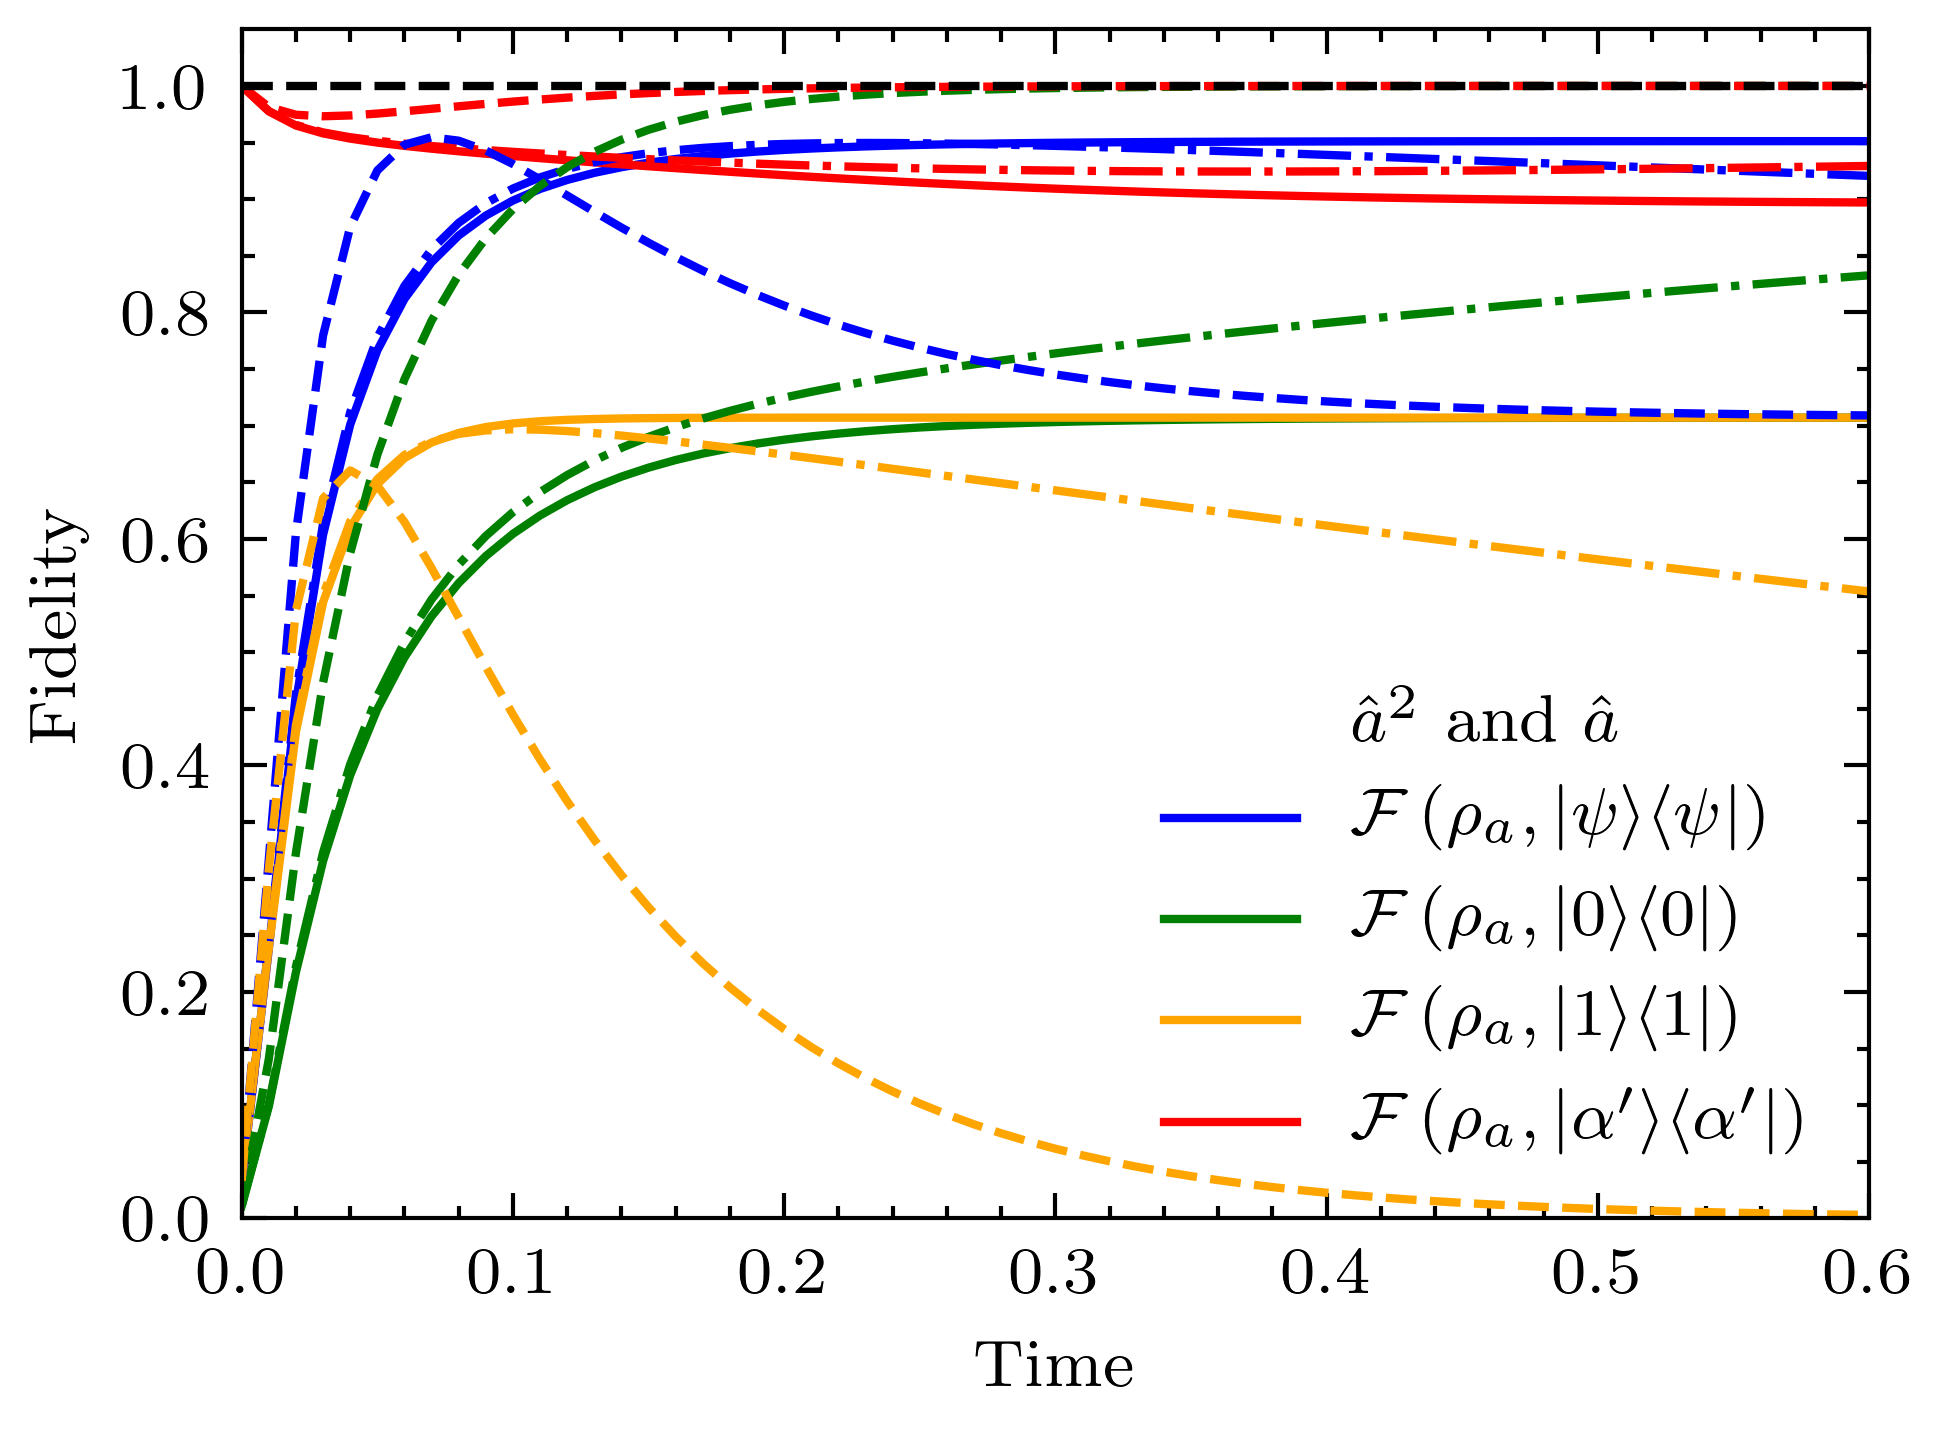

In [38]:
fig, ax = plt.subplots()

ax.plot(tlist, fid_list_steady_0, color="blue", label="$\\mathcal{F}\\left(\\rho_a, |\\psi\\rangle\\langle \\psi |\\right)$")
ax.plot(tlist, fid_list_vacuum_0, color="green", label="$\\mathcal{F}\\left(\\rho_a, |0\\rangle\\langle 0|\\right)$")
ax.plot(tlist, fid_list_one_0, color="orange", label="$\\mathcal{F}\\left(\\rho_a, |1\\rangle\\langle 1|\\right)$")
ax.plot(tlist, fid_list_coh_0, color="red", label="$\\mathcal{F}\\left(\\rho_a, |\\alpha^\\prime\\rangle\\langle \\alpha^\\prime |\\right)$")


ax.plot(tlist, fid_list_steady_1, color="blue", linestyle="-.")
ax.plot(tlist, fid_list_vacuum_1, color="green", linestyle="-.")
ax.plot(tlist, fid_list_one_1, color="orange", linestyle="-.")
ax.plot(tlist, fid_list_coh_1, color="red", linestyle="-.")

ax.plot(tlist, fid_list_steady_20, color="blue", linestyle="--")
ax.plot(tlist, fid_list_vacuum_20, color="green", linestyle="--")
ax.plot(tlist, fid_list_one_20, color="orange", linestyle="--")
ax.plot(tlist, fid_list_coh_20, color="red", linestyle="--")


ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="Fidelity")
ax.set_xlim([0, 0.6])
ax.set_ylim([0, 1.05])
ax.legend(title = "$\\hat{a}^2$ and $\\hat{a}$", loc=0)


fig.savefig("fidelities_aa_and_a.pdf")
fig.savefig("fidelities_aa_and_a.png", dpi=300)

# $\hat{a}\left(\hat{n}-1\right)$ and $\hat{a}$

Let's generate some evolution

In [19]:
# input parameters
options = qt.Options(nsteps=10000)
N = 35 # hilbert space size 
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
alphain = 3.0 # input coherent state amplitude


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian
x = (a + ad)/np.sqrt(2) # position operator. Equivalent to qt.position(N)
p = -1j * (a - ad)/np.sqrt(2) # momentum operator. Equivalent to qt.position(N)


# input state
psi0 = qt.coherent(N, alphain, method="operator")

def ncl_decay(gamma_1):
    coplist = [np.sqrt(gamma_3) * a * (n - 1), np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

In [10]:
# graph of fidelities to target states

const_list_1 = np.full(len(tlist), 1)


# gamma_1 = 0.0
states_0 = ncl_decay(0)

    
# fidelity to vacuum state
fid_list_vacuum_0 = []
for idx, val in enumerate(states_0):
    fid_list_vacuum_0.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_0 = []
for idx, val in enumerate(states_0):
    fid_list_one_0.append(qt.fidelity(val, qt.fock(N, 1)))
    
# fidelity to equivalent coherent state
fid_list_coh_0 = []
for idx, val in enumerate(states_0):
    fid_list_coh_0.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
    
    
# gamma_1 = 1.0
states_1 = ncl_decay(1)

    
# fidelity to vacuum state
fid_list_vacuum_1 = []
for idx, val in enumerate(states_1):
    fid_list_vacuum_1.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_1 = []
for idx, val in enumerate(states_1):
    fid_list_one_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
# fidelity to equivalent coherent state
fid_list_coh_1 = []
for idx, val in enumerate(states_1):
    fid_list_coh_1.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))   
    
# gamma_1 = 2.0
states_2 = ncl_decay(2)

    
# fidelity to vacuum state
fid_list_vacuum_2 = []
for idx, val in enumerate(states_2):
    fid_list_vacuum_2.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_2 = []
for idx, val in enumerate(states_2):
    fid_list_one_2.append(qt.fidelity(val, qt.fock(N, 1)))

    
# fidelity to equivalent coherent state
fid_list_coh_2 = []
for idx, val in enumerate(states_2):
    fid_list_coh_2.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))    
    
# gamma_1 = 20
states_20 = ncl_decay(20)

    
# fidelity to vacuum state
fid_list_vacuum_20 = []
for idx, val in enumerate(states_20):
    fid_list_vacuum_20.append(qt.fidelity(val, qt.fock(N, 0)))
    
# fidelity to one-photon state
fid_list_one_20 = []
for idx, val in enumerate(states_20):
    fid_list_one_20.append(qt.fidelity(val, qt.fock(N, 1)))

# fidelity to equivalent coherent state
fid_list_coh_20 = []
for idx, val in enumerate(states_20):
    fid_list_coh_20.append(qt.fidelity(val, qt.coherent(N, np.sqrt(qt.expect(n, val)))))
    

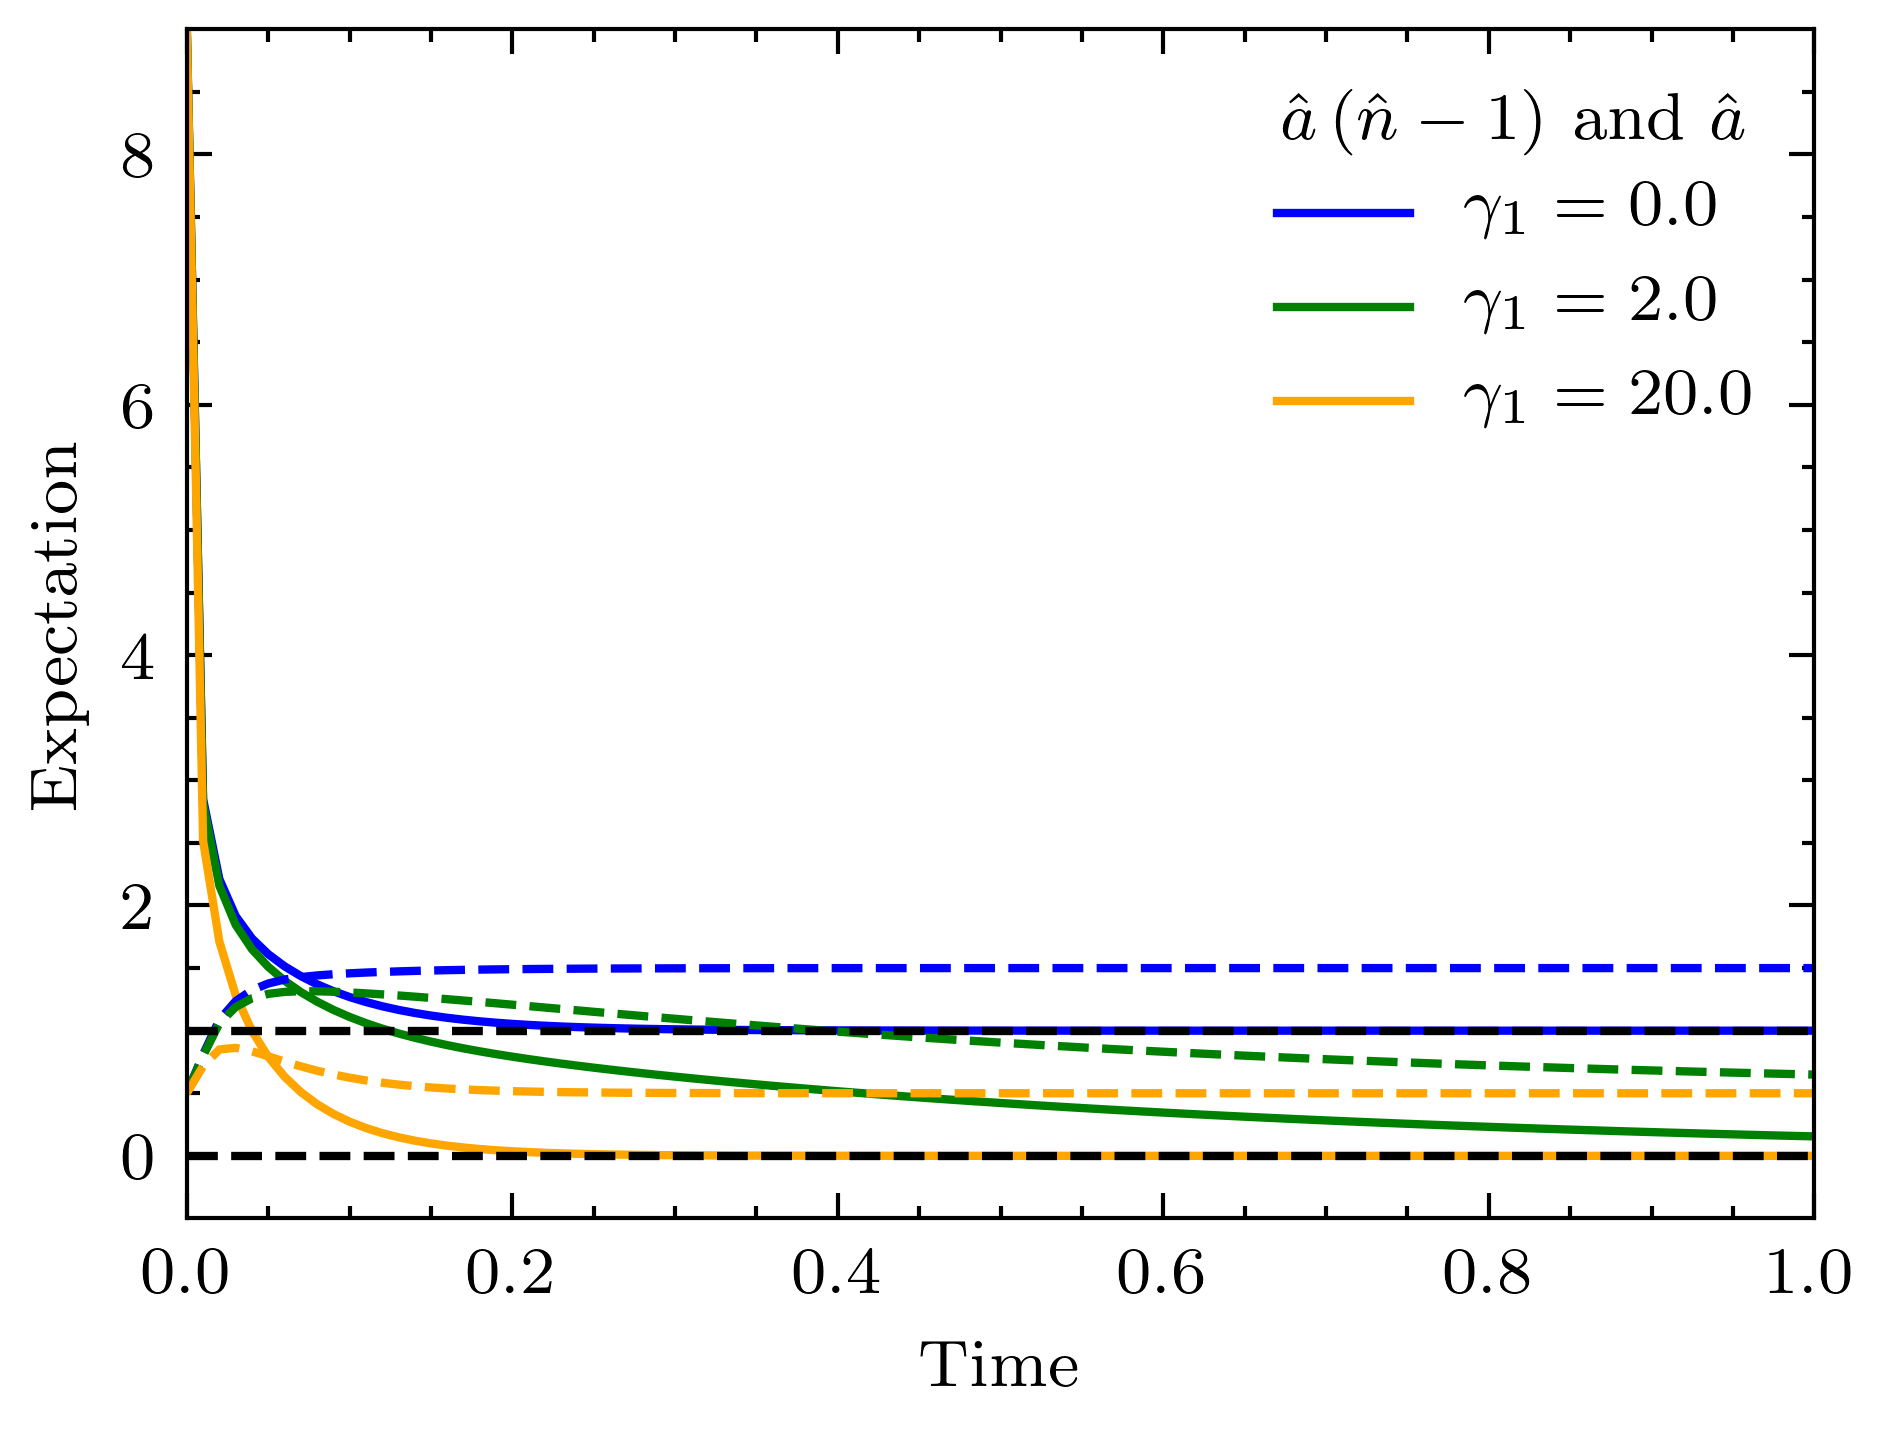

In [22]:
# graph of expectations

const_list_0 = np.full(len(tlist), 0)
const_list_1 = np.full(len(tlist), 1)

ymax = max(qt.expect(n, states_1))
fig, ax = plt.subplots()

ax.plot(tlist, qt.expect(n, states_0), color="blue", label="$\\gamma_1 = 0.0$")
ax.plot(tlist, qt.expect(n, states_2), color="green", label="$\\gamma_1 = 2.0$")
ax.plot(tlist, qt.expect(n, states_20), color="orange", label="$\\gamma_1 = 20.0$")
# ax.plot(tlist, qt.expect(a, result.states), label="$\\langle\\hat{a}\\rangle$")

ax.plot(tlist, qt.variance(x, states_0), color="blue" ,linestyle="--")
ax.plot(tlist, qt.variance(x, states_2), color="green" ,linestyle="--")
ax.plot(tlist, qt.variance(x, states_20), color="orange" ,linestyle="--")

ax.plot(tlist, const_list_0, color="black", linestyle="--")
ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.set(xlabel="Time")
ax.set(ylabel="Expectation")
# ax.legend(loc=0)
ax.legend(title = "$\\hat{a}\\left(\\hat{n} - 1\\right)$ and $\hat{a}$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-0.5,ymax]);

fig.savefig("expects_ncl1_and_a.pdf")
fig.savefig("expects_ncl1_and_a.png", dpi=300)

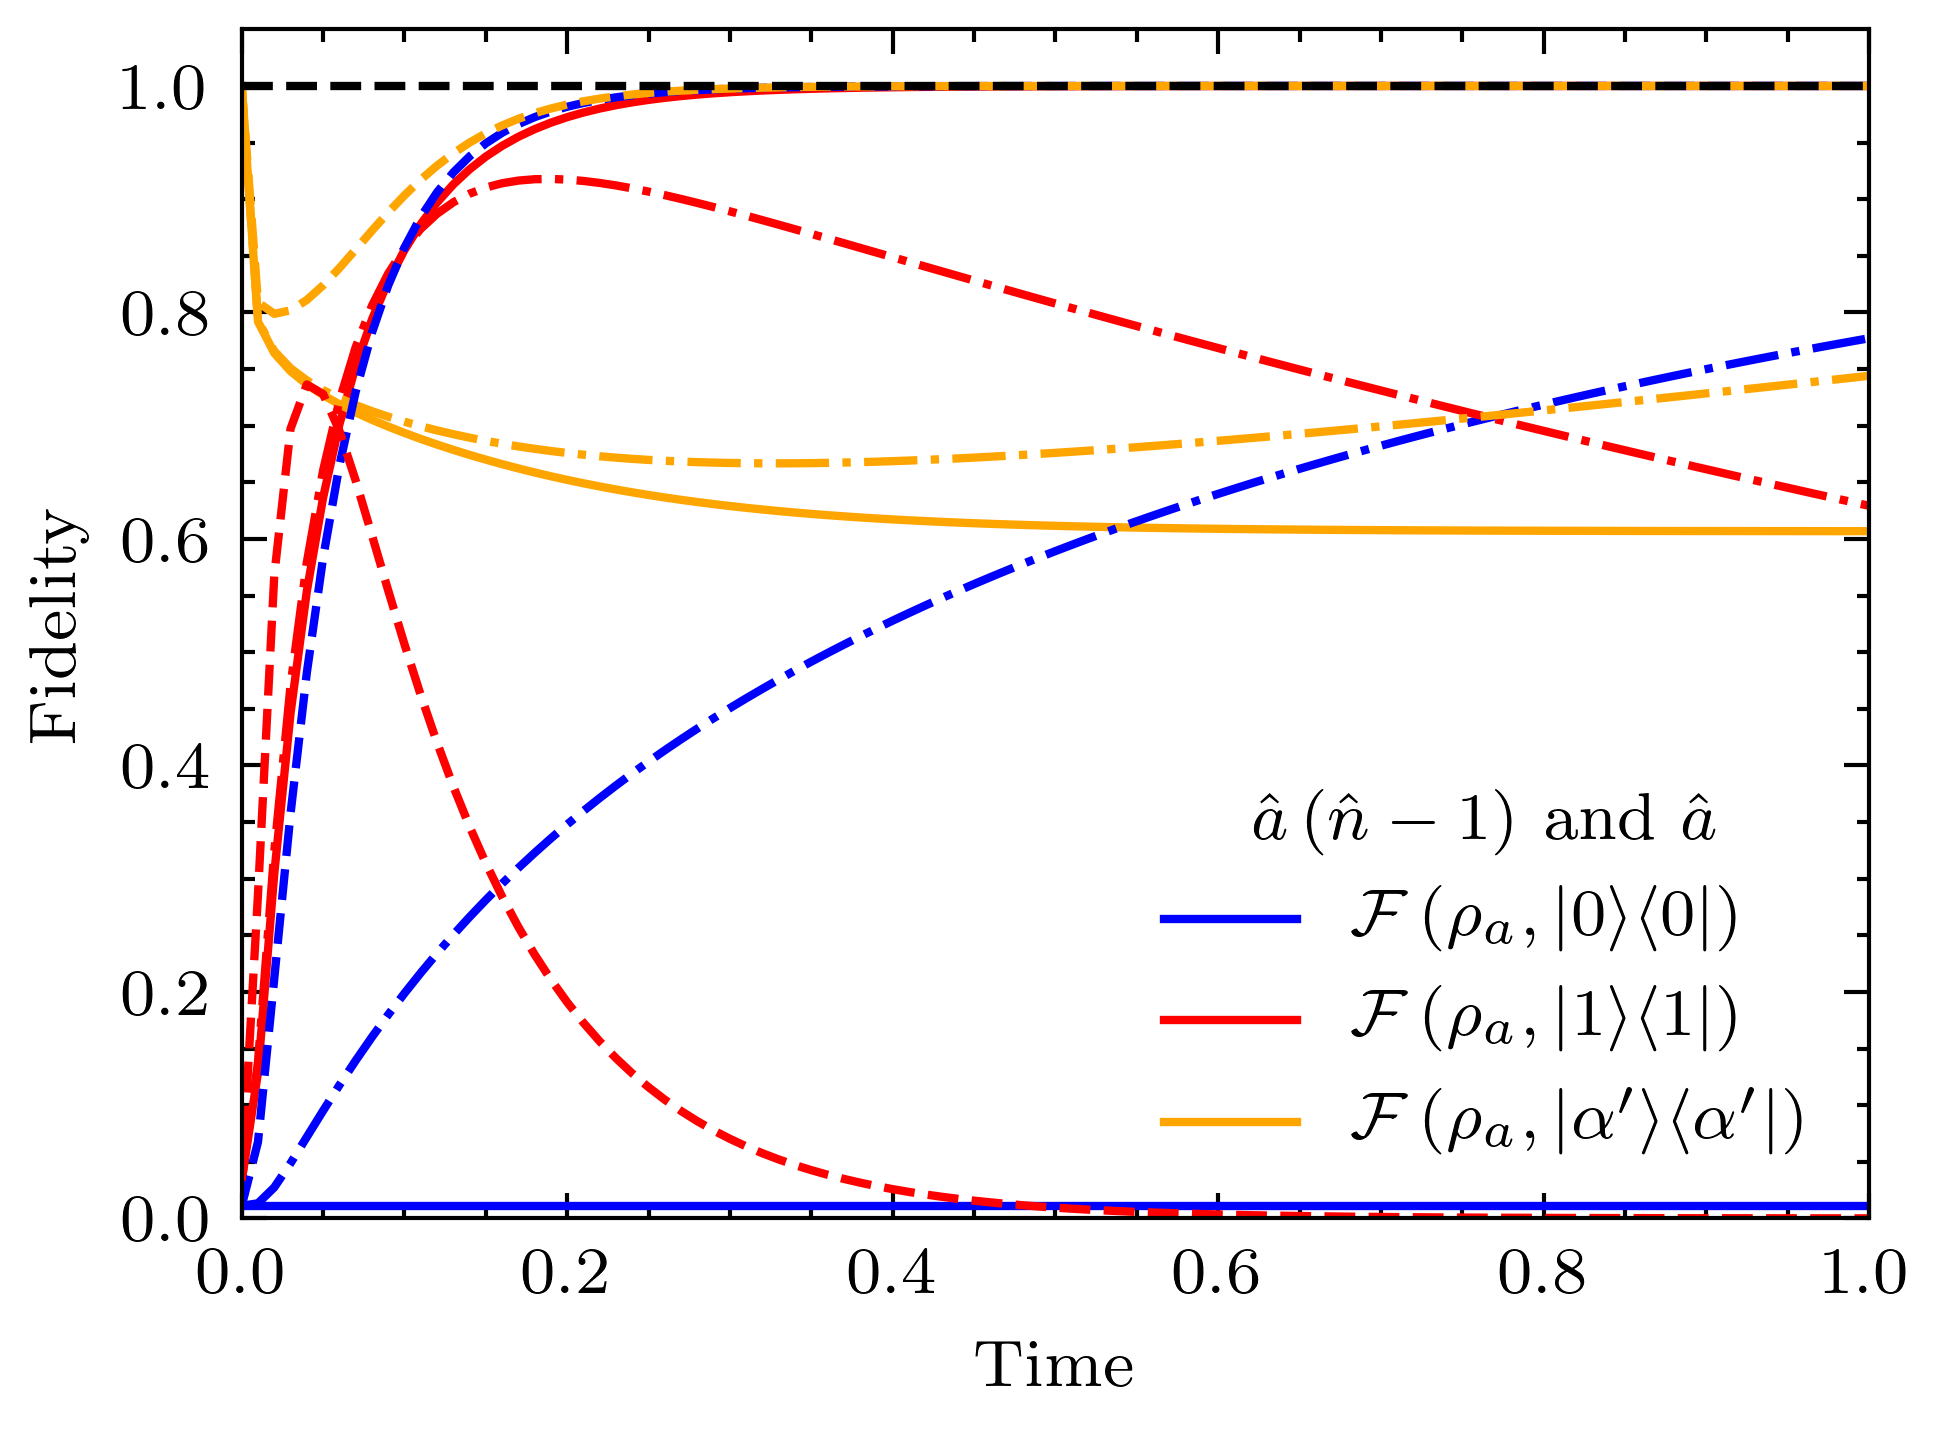

In [25]:
fig, ax = plt.subplots()

ax.plot(tlist, fid_list_vacuum_0, color="blue", label="$\\mathcal{F}\\left(\\rho_a, |0\\rangle\\langle 0|\\right)$")
ax.plot(tlist, fid_list_one_0, color="red", label="$\\mathcal{F}\\left(\\rho_a, |1\\rangle\\langle 1|\\right)$")
ax.plot(tlist, fid_list_coh_0, color="orange", label="$\\mathcal{F}\\left(\\rho_a, |\\alpha^\\prime\\rangle\\langle \\alpha^\\prime |\\right)$")


ax.plot(tlist, fid_list_vacuum_1, color="blue", linestyle="-.")
ax.plot(tlist, fid_list_one_1, color="red", linestyle="-.")
ax.plot(tlist, fid_list_coh_1, color="orange", linestyle="-.")

ax.plot(tlist, fid_list_vacuum_20, color="blue", linestyle="--")
ax.plot(tlist, fid_list_one_20, color="red", linestyle="--")
ax.plot(tlist, fid_list_coh_20, color="orange", linestyle="--")


ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="Fidelity")
# ax.set_xlim([0, 0.6])
ax.set_ylim([0, 1.05])
ax.legend(title = "$\\hat{a}\\left(\\hat{n}-1\\right)$ and $\\hat{a}$", loc=0)


fig.savefig("fidelities_ncl1_and_a.pdf")
fig.savefig("fidelities_ncl1_and_a.png", dpi=300)

# Does increasing $\alpha_{in}$ increase the max fidelity?

## NCL $\rightarrow$ single photons

Let's generate some evolution

In [70]:
# input parameters
options = qt.Options(nsteps=10000)
N = 35 # hilbert space size 
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
# alphain = 3.0 # input coherent state amplitude


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian



def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qt.coherent(N, alphain, method="analytic")
    coplist = [np.sqrt(gamma_3) * a * (n - 1), np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

First, a graph showing that increasing alpha increases Fidelity to target state

In [46]:
#
# alpha = 2.0
#

#gamma_1 = 0.0
states_2_0 = ncl_decay(2.0, 0)

# gamma_1 = 1.0
states_2_1 = ncl_decay(2.0, 1)

# gamma_1 = 20.0
states_2_20 = ncl_decay(2.0, 20)

fid_list_one_2_0 = []
for idx, val in enumerate(states_2_0):
    fid_list_one_2_0.append(qt.fidelity(val, qt.fock(N, 1)))

fid_list_one_2_1 = []
for idx, val in enumerate(states_2_1):
    fid_list_one_2_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
fid_list_one_2_20 = []
for idx, val in enumerate(states_2_20):
    fid_list_one_2_20.append(qt.fidelity(val, qt.fock(N, 1)))

print("alpha=2.0 done")    

alpha=2.0 done


In [47]:
#
# alpha = 3.0
#

#gamma_1 = 0.0
states_3_0 = ncl_decay(3.0, 0)


# gamma_1 = 1.0
states_3_1 = ncl_decay(3.0, 1)

# gamma_1 = 20.0
states_3_20 = ncl_decay(3.0, 20)

fid_list_one_3_0 = []
for idx, val in enumerate(states_3_0):
    fid_list_one_3_0.append(qt.fidelity(val, qt.fock(N, 1)))

fid_list_one_3_1 = []
for idx, val in enumerate(states_3_1):
    fid_list_one_3_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
fid_list_one_3_20 = []
for idx, val in enumerate(states_3_20):
    fid_list_one_3_20.append(qt.fidelity(val, qt.fock(N, 1)))
    
print("alpha=3.0 done")    

alpha=3.0 done


In [48]:
#
# alpha = 4.0
#

#gamma_1 = 0.0
states_4_0 = ncl_decay(4.0, 0)

# gamma_1 = 1.0
states_4_1 = ncl_decay(4.0, 1)

# gamma_1 = 20.0
states_4_20 = ncl_decay(4.0, 20)

fid_list_one_4_0 = []
for idx, val in enumerate(states_4_0):
    fid_list_one_4_0.append(qt.fidelity(val, qt.fock(N, 1)))

fid_list_one_4_1 = []
for idx, val in enumerate(states_4_1):
    fid_list_one_4_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
fid_list_one_4_20 = []
for idx, val in enumerate(states_4_20):
    fid_list_one_4_20.append(qt.fidelity(val, qt.fock(N, 1)))    

print("alpha=4.0 done")    

alpha=4.0 done


DONE: check normalization before I plot
    - $\alpha=5.0$ is not normalized

In [65]:
# input parameters
options = qt.Options(nsteps=20000)
N = 50 # hilbert space size 
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
# alphain = 3.0 # input coherent state amplitude


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian



def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qt.coherent(N, alphain, method="analytic")
    coplist = [np.sqrt(gamma_3) * a * (n - 1), np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

In [66]:
#
# alpha = 5.0
#

#gamma_1 = 0.0
states_5_0 = ncl_decay(5.0, 0)
print("alpha=5.0 done")    

# gamma_1 = 1.0
states_5_1 = ncl_decay(5.0, 1)
print("alpha=5.0 done")    

# gamma_1 = 20.0
states_5_20 = ncl_decay(5.0, 20)
print("alpha=5.0 done")    

fid_list_one_5_0 = []
for idx, val in enumerate(states_5_0):
    fid_list_one_5_0.append(qt.fidelity(val, qt.fock(N, 1)))

fid_list_one_5_1 = []
for idx, val in enumerate(states_5_1):
    fid_list_one_5_1.append(qt.fidelity(val, qt.fock(N, 1)))
    
fid_list_one_5_20 = []
for idx, val in enumerate(states_5_20):
    fid_list_one_5_20.append(qt.fidelity(val, qt.fock(N, 1)))  
    


alpha=5.0 done


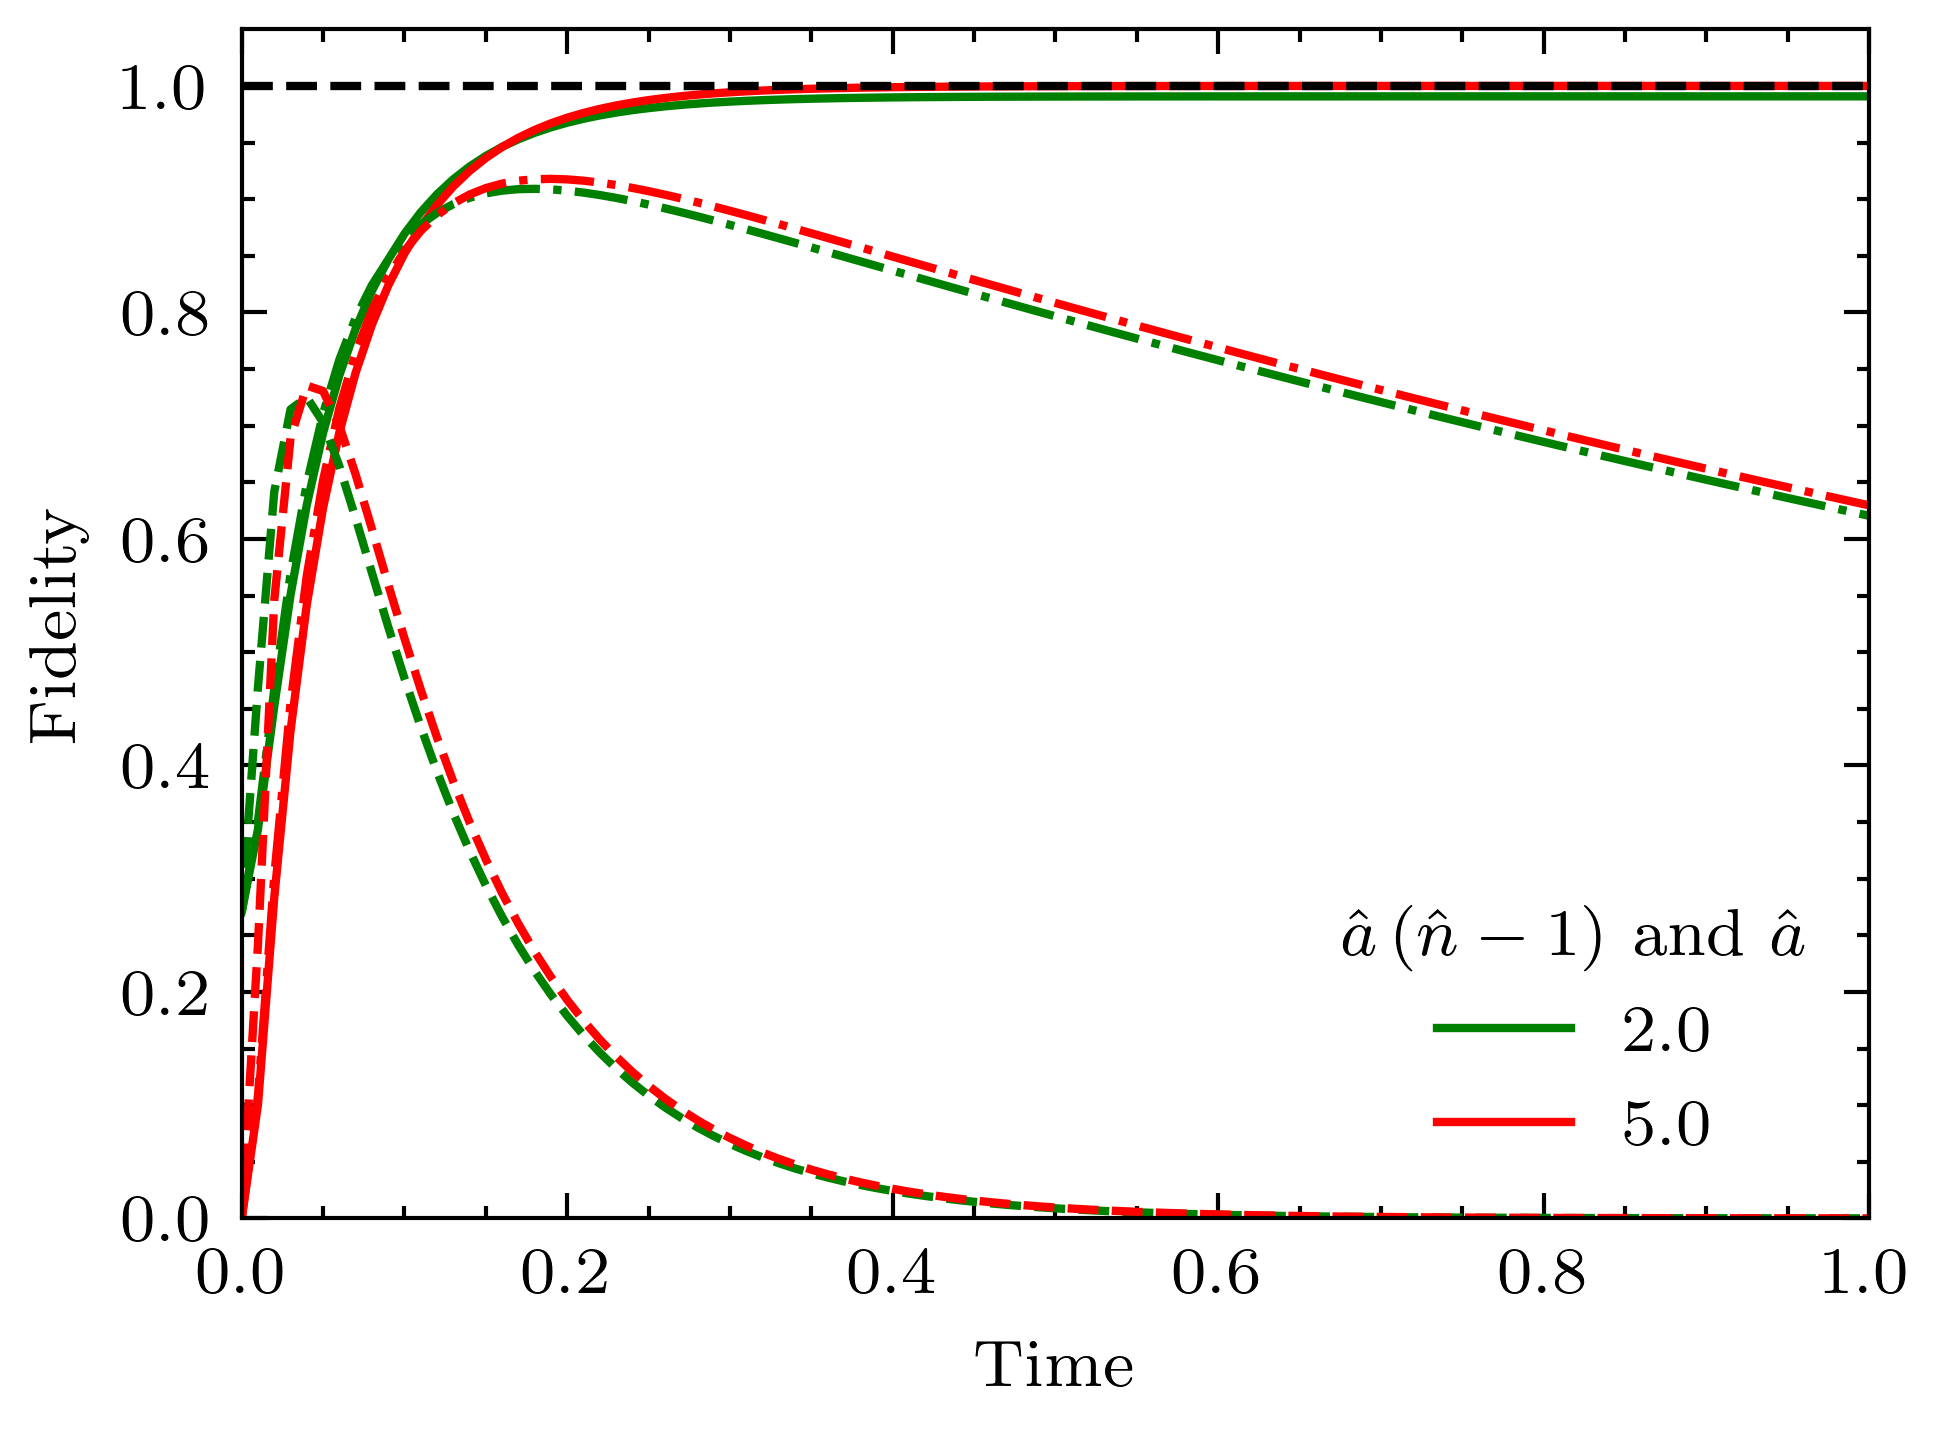

In [69]:
fig, ax = plt.subplots()


ax.plot(tlist, fid_list_one_2_0, color="green", label="$2.0$")
# ax.plot(tlist, fid_list_one_3_0, color="blue", label="$3.0$")
# ax.plot(tlist, fid_list_one_4_0, color="orange", label="4.0")
ax.plot(tlist, fid_list_one_5_0, color="red", label="5.0")

ax.plot(tlist, fid_list_one_2_1, color="green", linestyle="-.")
# ax.plot(tlist, fid_list_one_3_1, color="blue", linestyle="-.")
# ax.plot(tlist, fid_list_one_4_1, color="orange", linestyle="-.")
ax.plot(tlist, fid_list_one_5_1, color="red", linestyle="-.")

ax.plot(tlist, fid_list_one_2_20, color="green", linestyle="--")
# ax.plot(tlist, fid_list_one_3_20, color="blue", linestyle="--")
# ax.plot(tlist, fid_list_one_4_20, color="orange", linestyle="--")
ax.plot(tlist, fid_list_one_5_20, color="red", linestyle="--")







ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.autoscale(tight=True)
ax.set(xlabel="Time")
ax.set(ylabel="Fidelity")
# ax.set_xlim([0, 0.6])
ax.set_ylim([0, 1.05])
ax.legend(title = "$\\hat{a}\\left(\\hat{n}-1\\right)$ and $\\hat{a}$", loc=0)


fig.savefig("fidelities_ncl1_and_a_different_alphas.pdf")
fig.savefig("fidelities_ncl1_and_a_different_alphas.png", dpi=300)

## Max fidelity

In [ ]:
ncl_decay(alphain, gamma_1)

In [75]:
states_list = ncl_decay(3.0, 20.0)

In [83]:
def max_fidelity(_stateslist):
    fid_list = []
    for idx, val in enumerate(_stateslist):
        fid_list.append(qt.fidelity(val, qt.fock(N, 1)))

    return max(fid_list)

In [90]:
gam_list = np.arange(0.0, 21.0, 1.0)

In [92]:
alphaTest = 2.0;
max_fid_list_2 = []
for idx, val in enumerate(gam_list):
    max_fid_list_2.append(max_fidelity(ncl_decay(alphaTest, val)))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


In [93]:
alphaTest = 3.0;
max_fid_list_3 = []
for idx, val in enumerate(gam_list):
    max_fid_list_3.append(max_fidelity(ncl_decay(alphaTest, val)))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


In [94]:
alphaTest = 1.0;
max_fid_list_1 = []
for idx, val in enumerate(gam_list):
    max_fid_list_1.append(max_fidelity(ncl_decay(alphaTest, val)))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


In [95]:
alphaTest = 4.0;
max_fid_list_4 = []
for idx, val in enumerate(gam_list):
    max_fid_list_4.append(max_fidelity(ncl_decay(alphaTest, val)))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


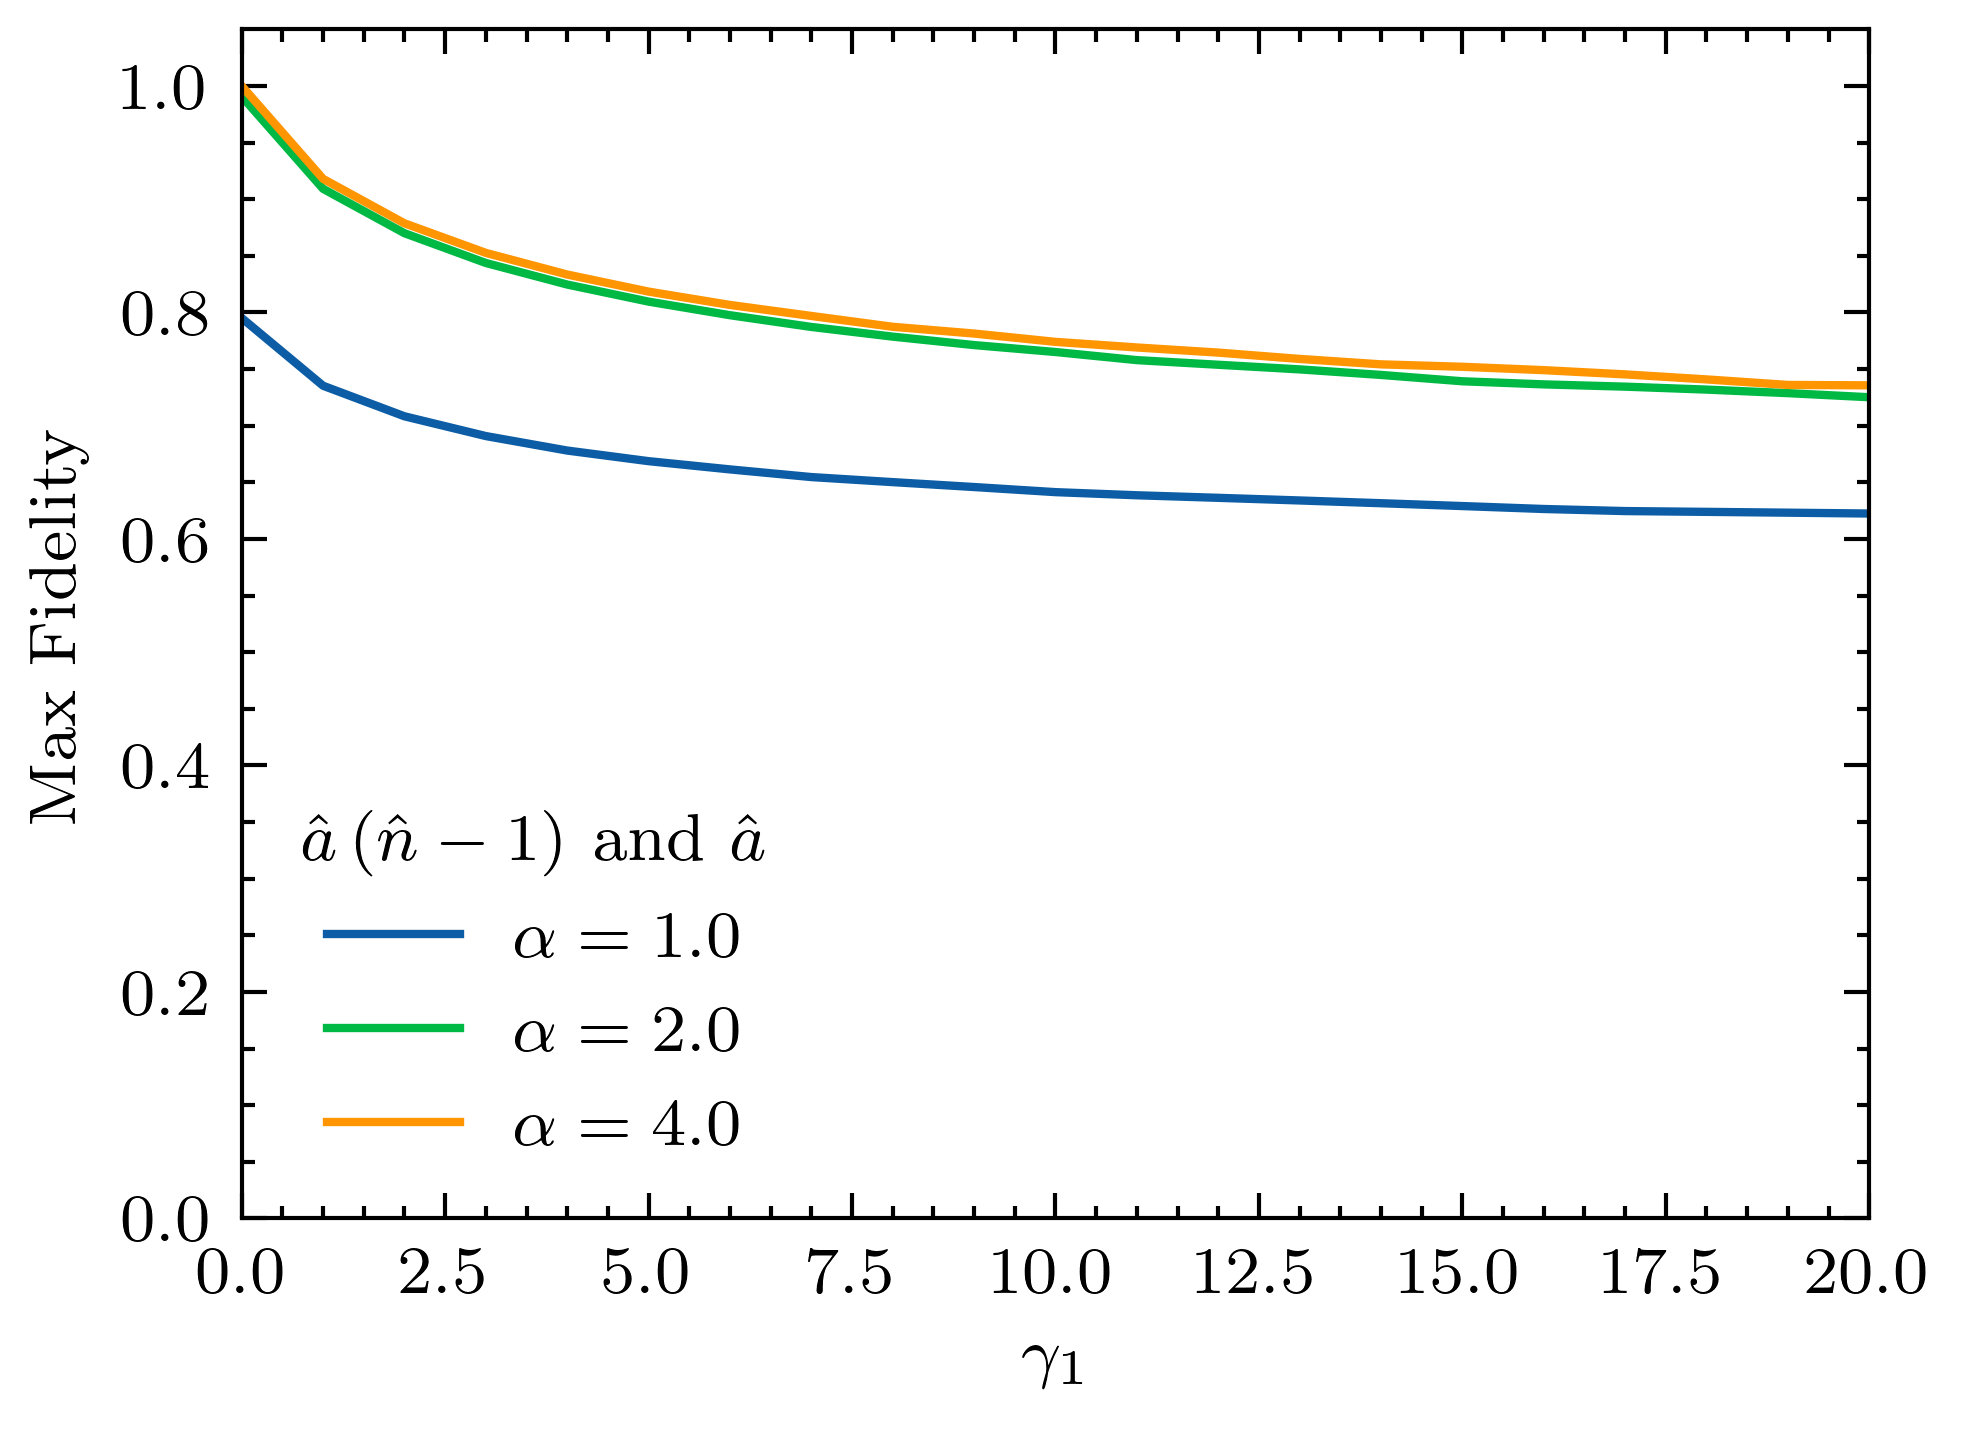

In [98]:
fig, ax = plt.subplots()

ax.plot(gam_list, max_fid_list_1, label="$\\alpha = 1.0$")
ax.plot(gam_list, max_fid_list_2, label="$\\alpha = 2.0$")
# ax.plot(gam_list, max_fid_list_3, label="$\\alpha = 3.0$")
ax.plot(gam_list, max_fid_list_4, label="$\\alpha = 4.0$")


# ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.autoscale(tight=True)
ax.set(xlabel="$\\gamma_1$")
ax.set(ylabel="Max Fidelity")
# ax.set_xlim([0, 0.6])
ax.set_ylim([0, 1.05])
ax.legend(title = "$\\hat{a}\\left(\\hat{n}-1\\right)$ and $\\hat{a}$", loc=0)


fig.savefig("max_fidelities_vs_gamma1_ncl1_and_a.pdf")
fig.savefig("max_fidelities_vs_gamma1_ncl1_and_a.png", dpi=300)

# Using Mandel parameter Q

## Long-time behaviour

Generating evolution

In [99]:
# input parameters
options = qt.Options(nsteps=10000)
N = 35
 # hilbert space size 
tlist = np.linspace(0, 1.0, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
# alphain = 3.0 # input coherent state amplitude


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian



def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qt.coherent(N, alphain, method="analytic")
    coplist = [np.sqrt(gamma_3) * a * (n - 1), np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def lin_decay(alphain, gamma_1):
    psi0 = qt.coherent(N, alphain, method="analytic")
    coplist = [np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def mandelQ(_state):
    _num = qt.expect(ad * ad * a * a, _state)
    _denom = qt.expect(ad * a, _state)
    
#     if _denom != 0:
#         return (_num/_denom) - _denom
#     elif _denom == 0:
#         return 0
    return (_num/_denom) - _denom

In [ ]:
# generating some states evolution

states_list_0 = ncl_decay(3.0, 0.0)
states_list_1 = ncl_decay(3.0, 1.0)
states_list_2 = ncl_decay(3.0, 2.0)
states_list_5 = ncl_decay(3.0, 5.0)
states_list_20 = ncl_decay(3.0, 20.0)

states_list_lin = lin_decay(3.0, 5.0)

In [100]:
# generating some lists of mandel parameter

q_list_0 = mandelQ(states_list_0)
q_list_1 = mandelQ(states_list_1)
q_list_2 = mandelQ(states_list_2)
q_list_5 = mandelQ(states_list_5)
q_list_20 = mandelQ(states_list_20)

q_list_lin = mandelQ(states_list_lin)

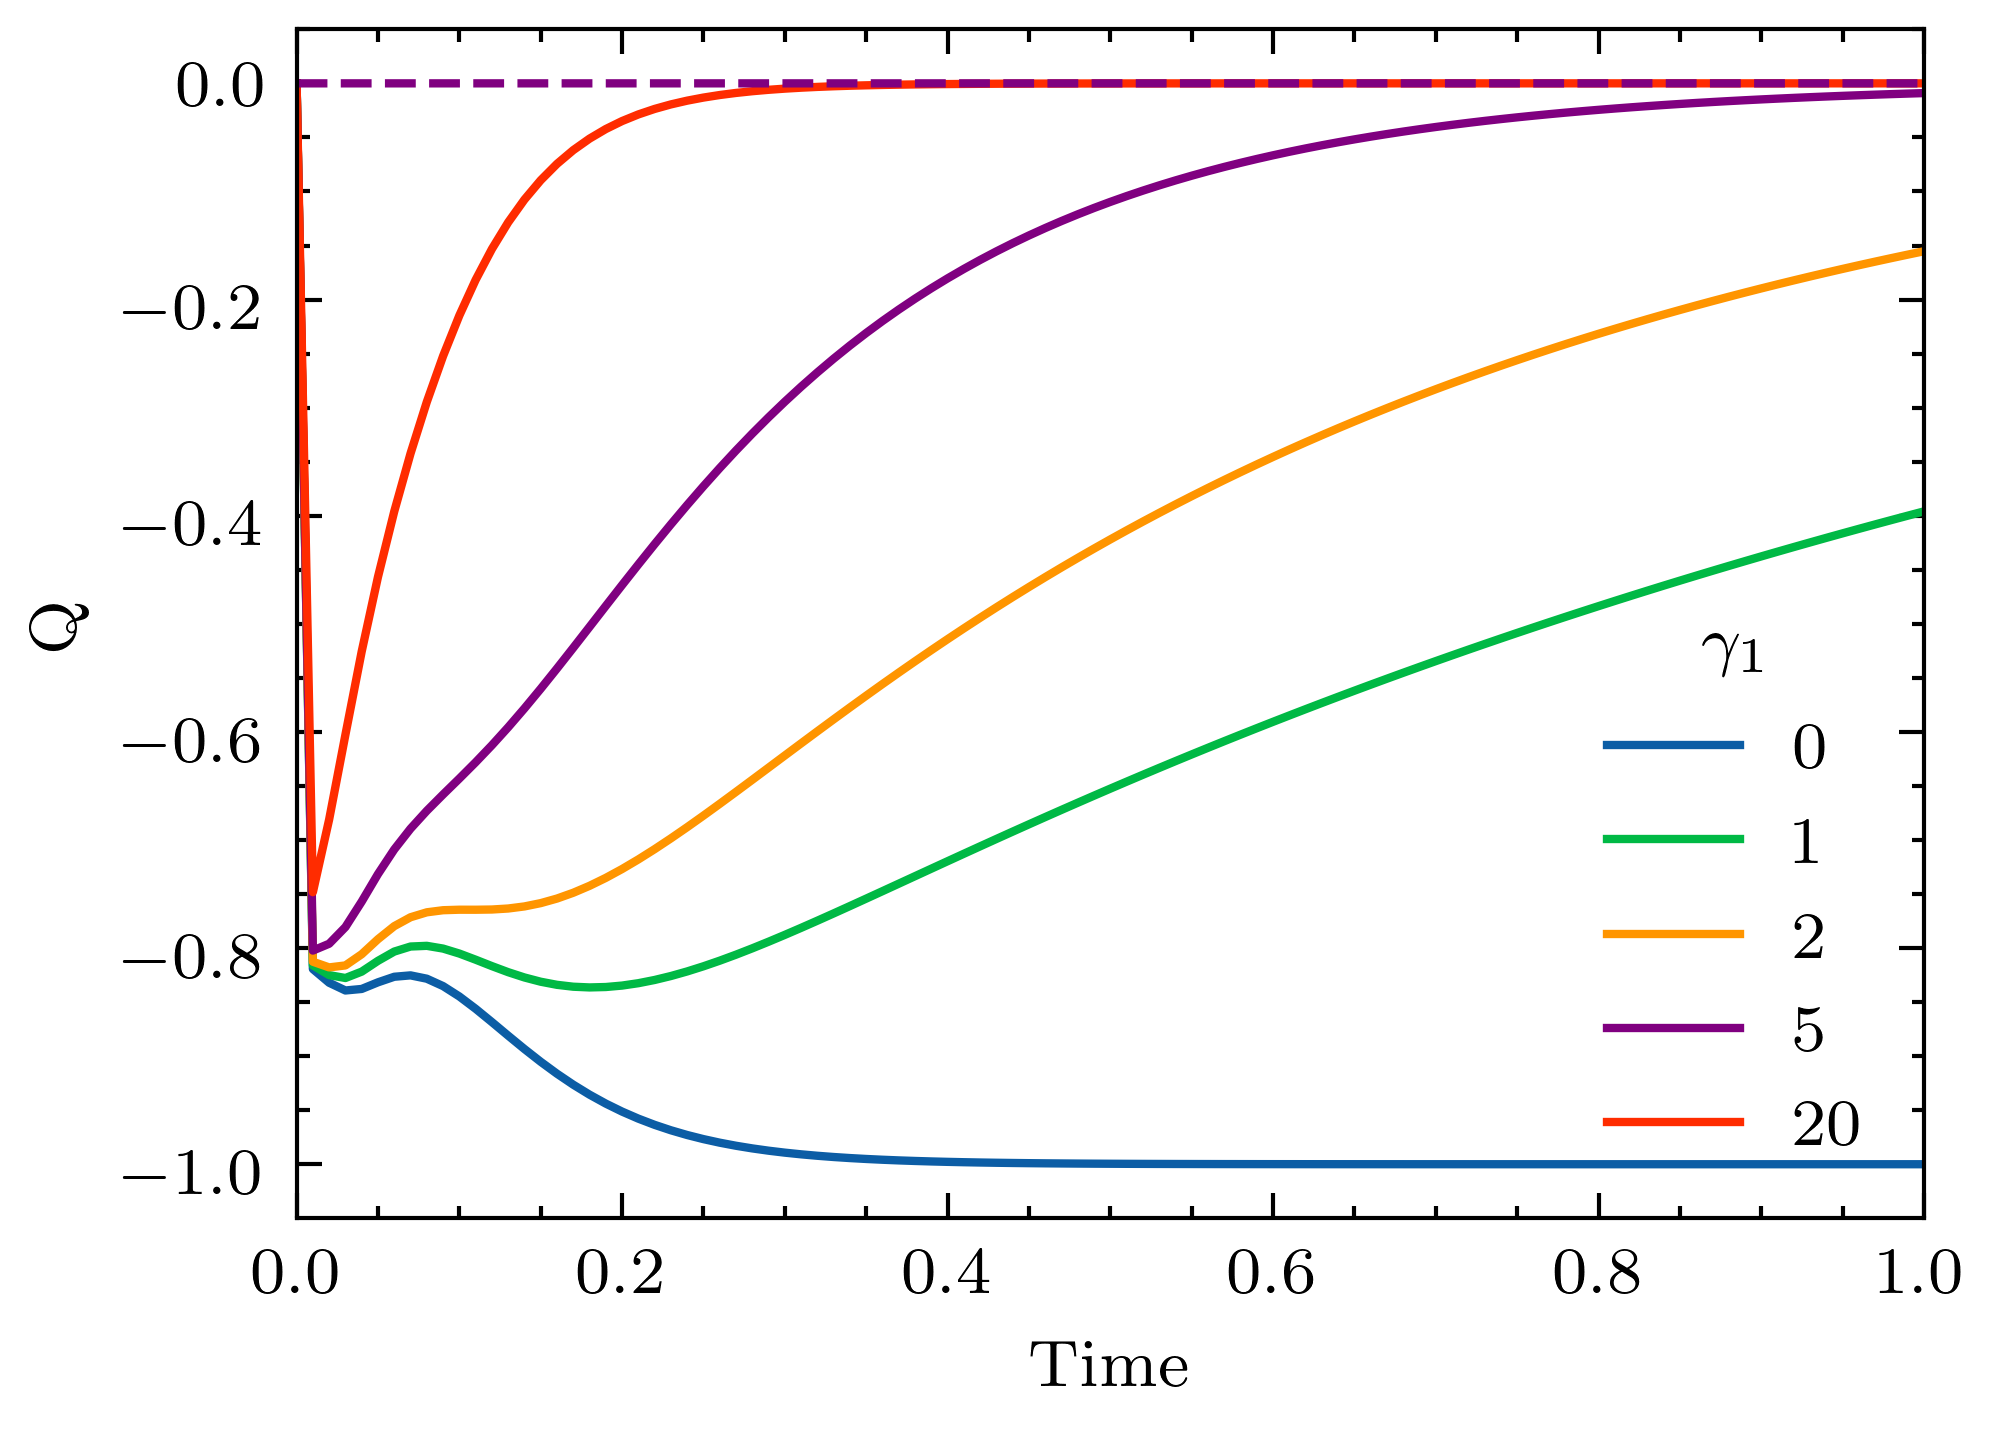

In [105]:
fig, ax = plt.subplots()

ax.plot(tlist, q_list_0, label="$0$")
ax.plot(tlist, q_list_1, label="$1$")
ax.plot(tlist, q_list_2, label="$2$")
ax.plot(tlist, q_list_5, label="$5$", color="purple")
ax.plot(tlist, q_list_20, label="$20$")

ax.plot(tlist, q_list_lin, color="purple", linestyle="--")


# ax.plot(tlist, const_list_0, color="black", linestyle="--")
# ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.set(xlabel="Time")
ax.set(ylabel="Q")
# ax.legend(loc=0)
ax.legend(title = "$\\gamma_1$", loc=4)
ax.autoscale(tight=True)
ax.set_ylim([-1.05, 0.05]);

fig.savefig("mandelQ_varying_gamma1.pdf")
fig.savefig("mandelQ_varying_gamma1.png", dpi=300)

## Short-time behaviour

In [115]:
# input parameters
options = qt.Options(nsteps=10000)
N = 35
 # hilbert space size 
tlist = np.linspace(0, 0.05, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
# alphain = 3.0 # input coherent state amplitude


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian



def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qt.coherent(N, alphain, method="analytic")
    coplist = [np.sqrt(gamma_3) * a * (n - 1), np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def lin_decay(alphain, gamma_1):
    psi0 = qt.coherent(N, alphain, method="analytic")
    coplist = [np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def mandelQ(_state):
    _num = qt.expect(ad * ad * a * a, _state)
    _denom = qt.expect(ad * a, _state)
    
#     if _denom != 0:
#         return (_num/_denom) - _denom
#     elif _denom == 0:
#         return 0
    return (_num/_denom) - _denom

In [116]:
# generating some states evolution

states_list_0 = ncl_decay(3.0, 0.0)
states_list_1 = ncl_decay(3.0, 1.0)
states_list_2 = ncl_decay(3.0, 2.0)
states_list_5 = ncl_decay(3.0, 5.0)
states_list_20 = ncl_decay(3.0, 20.0)
states_list_lin = lin_decay(3.0, 5.0)

In [117]:
# generating some lists of mandel parameter

q_list_0 = mandelQ(states_list_0)
q_list_1 = mandelQ(states_list_1)
q_list_2 = mandelQ(states_list_2)
q_list_5 = mandelQ(states_list_5)
q_list_20 = mandelQ(states_list_20)

q_list_lin = mandelQ(states_list_lin)

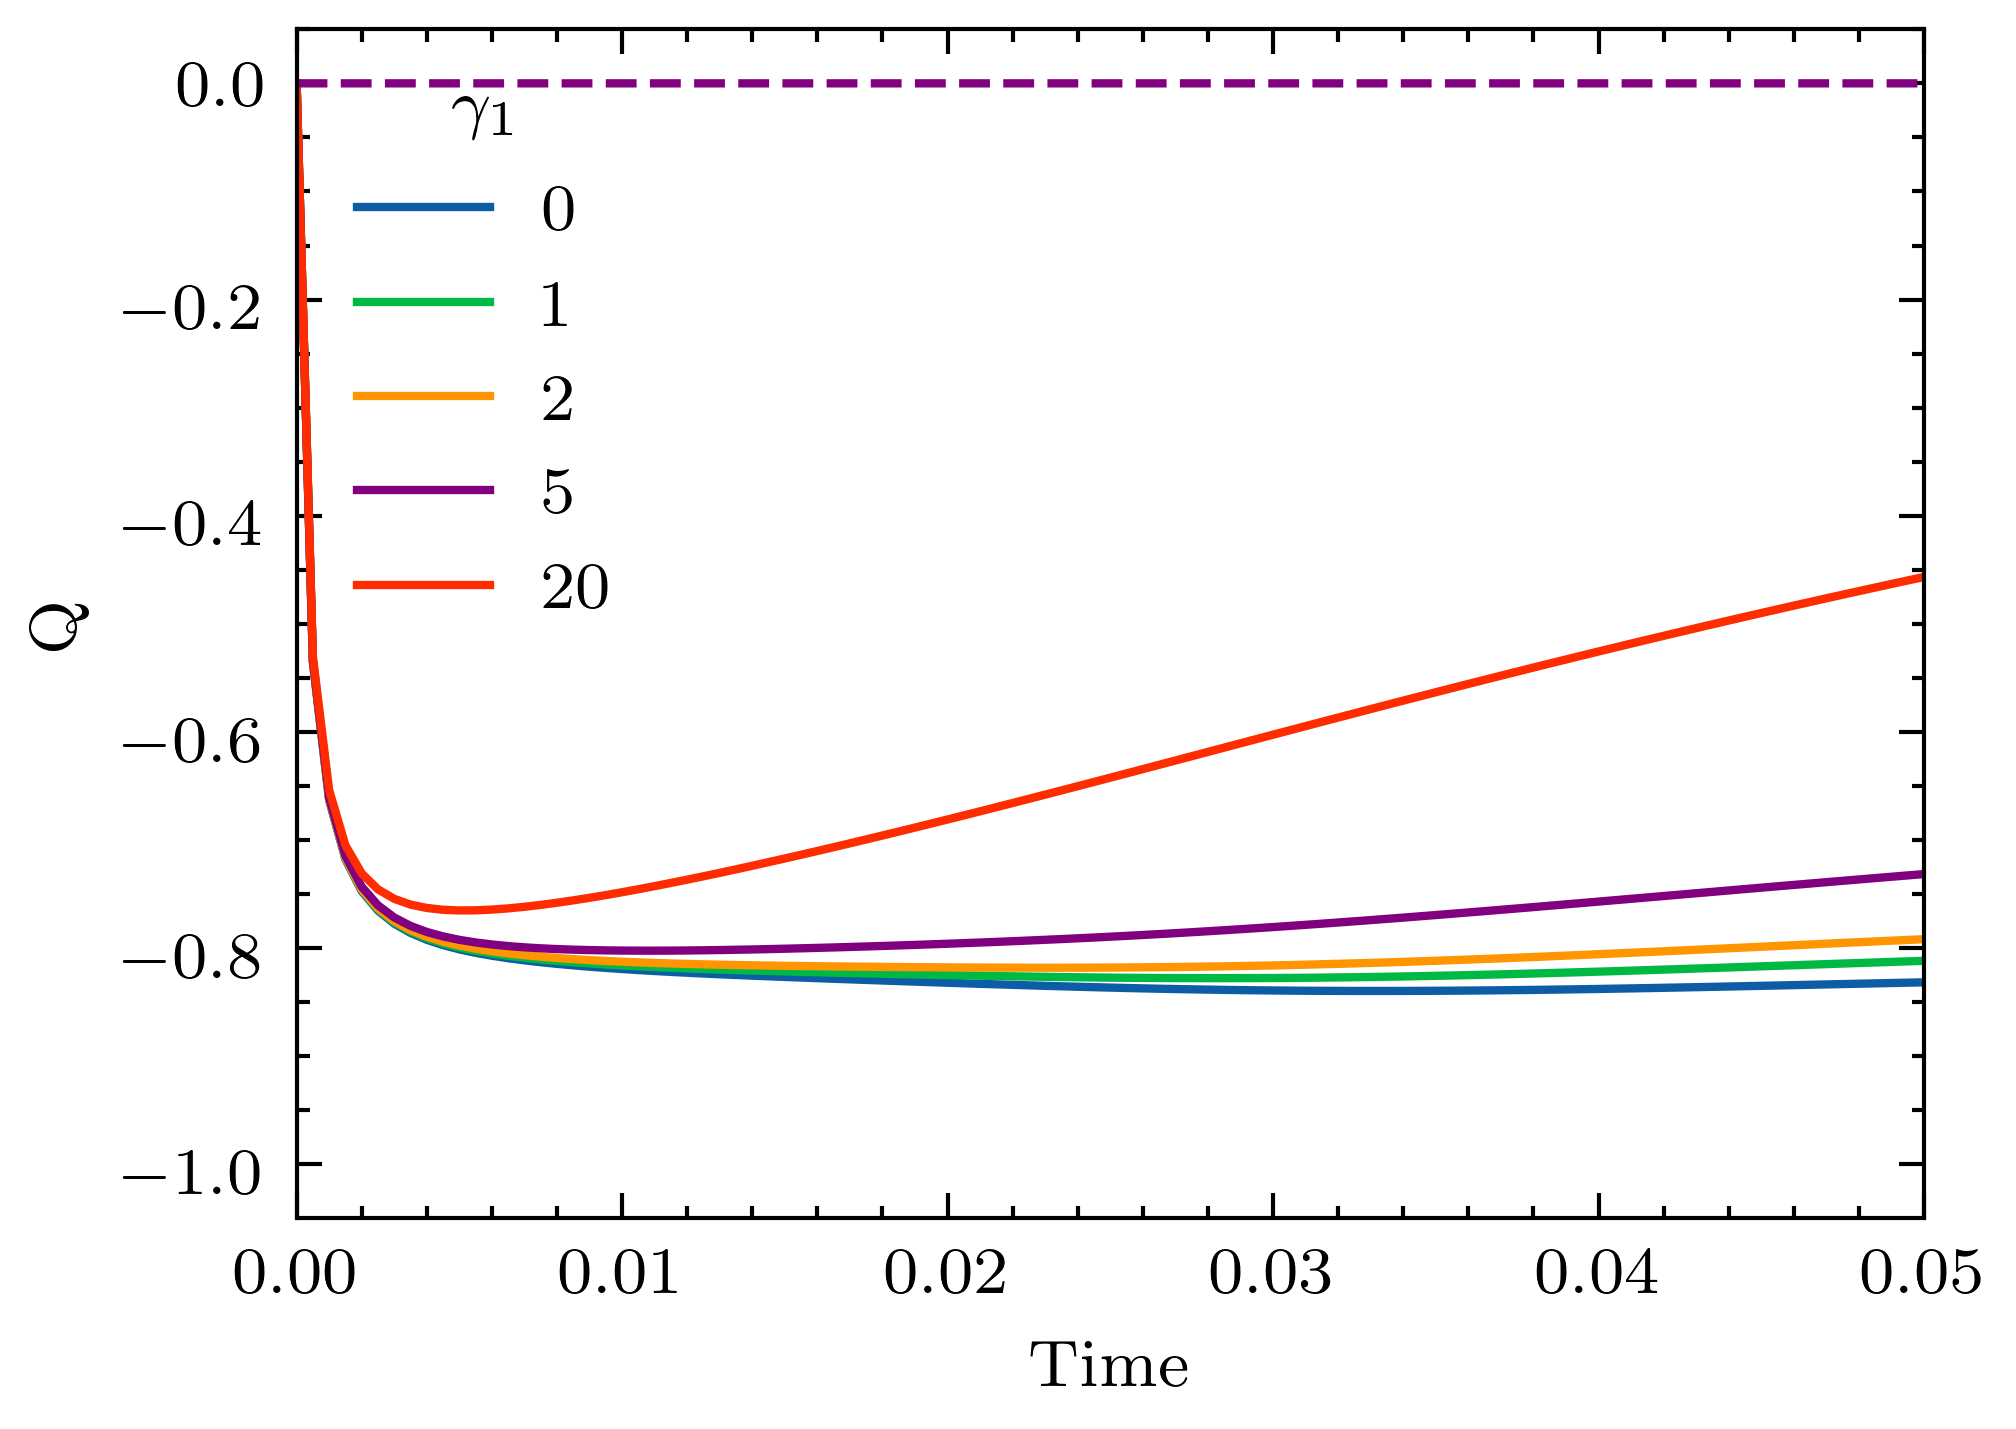

In [120]:
fig, ax = plt.subplots()

ax.plot(tlist, q_list_0, label="$0$")
ax.plot(tlist, q_list_1, label="$1$")
ax.plot(tlist, q_list_2, label="$2$")
ax.plot(tlist, q_list_5, label="$5$", color="purple")
ax.plot(tlist, q_list_20, label="$20$")

ax.plot(tlist, q_list_lin, color="purple", linestyle="--")


# ax.plot(tlist, const_list_0, color="black", linestyle="--")
# ax.plot(tlist, const_list_1, color="black", linestyle="--")

ax.set(xlabel="Time")
ax.set(ylabel="Q")
# ax.legend(loc=0)
ax.legend(title = "$\\gamma_1$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-1.05, 0.05]);



fig.savefig("mandelQ_varying_gamma1_short_time.pdf")
fig.savefig("mandelQ_varying_gamma1_short_time.png", dpi=300)

## Best Q

In [160]:
# input parameters
options = qt.Options(nsteps=10000)
N = 35
 # hilbert space size 
tlist = np.linspace(0, 0.1, 101) # times over which to solve
gamma_3 = 8.0 # NCL rate
omega = 0.0 # free Hamiltonian frequency
# alphain = 3.0 # input coherent state amplitude


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian



def ncl_decay(alphain, gamma_1):
    # input state
    psi0 = qt.coherent(N, alphain, method="analytic")
    coplist = [np.sqrt(gamma_3) * a * (n - 1), np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def lin_decay(alphain, gamma_1):
    psi0 = qt.coherent(N, alphain, method="analytic")
    coplist = [np.sqrt(gamma_1) * a]
    result = qt.mesolve(H, psi0, tlist, coplist, [], options=options)
    return result.states

def mandelQ(_state):
    _num = qt.expect(ad * ad * a * a, _state)
    _denom = qt.expect(ad * a, _state)
    
#     if _denom != 0:
#         return (_num/_denom) - _denom
#     elif _denom == 0:
#         return 0
    return (_num/_denom) - _denom

def bestQ(alphain, gamma_1):
    _states = ncl_decay(alphain, gamma_1)
    
    return min(mandelQ(_states))

In [151]:
gam_list = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0])

In [166]:
# alpha = 3
bestQ_list_3 = []
alpha_test = 3.0
for idx, val in enumerate(gam_list):
    bestQ_list_3.append(bestQ(alpha_test, val))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


In [167]:
# alpha = 2
bestQ_list_2 = []
alpha_test = 2.0
for idx, val in enumerate(gam_list):
    bestQ_list_2.append(bestQ(alpha_test, val))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


In [168]:
# alpha = 4
bestQ_list_4 = []
alpha_test = 4.0
for idx, val in enumerate(gam_list):
    bestQ_list_4.append(bestQ(alpha_test, val))
    update_progress(idx / len(gam_list))
    
update_progress(1)

Progress: [####################] 100.0%


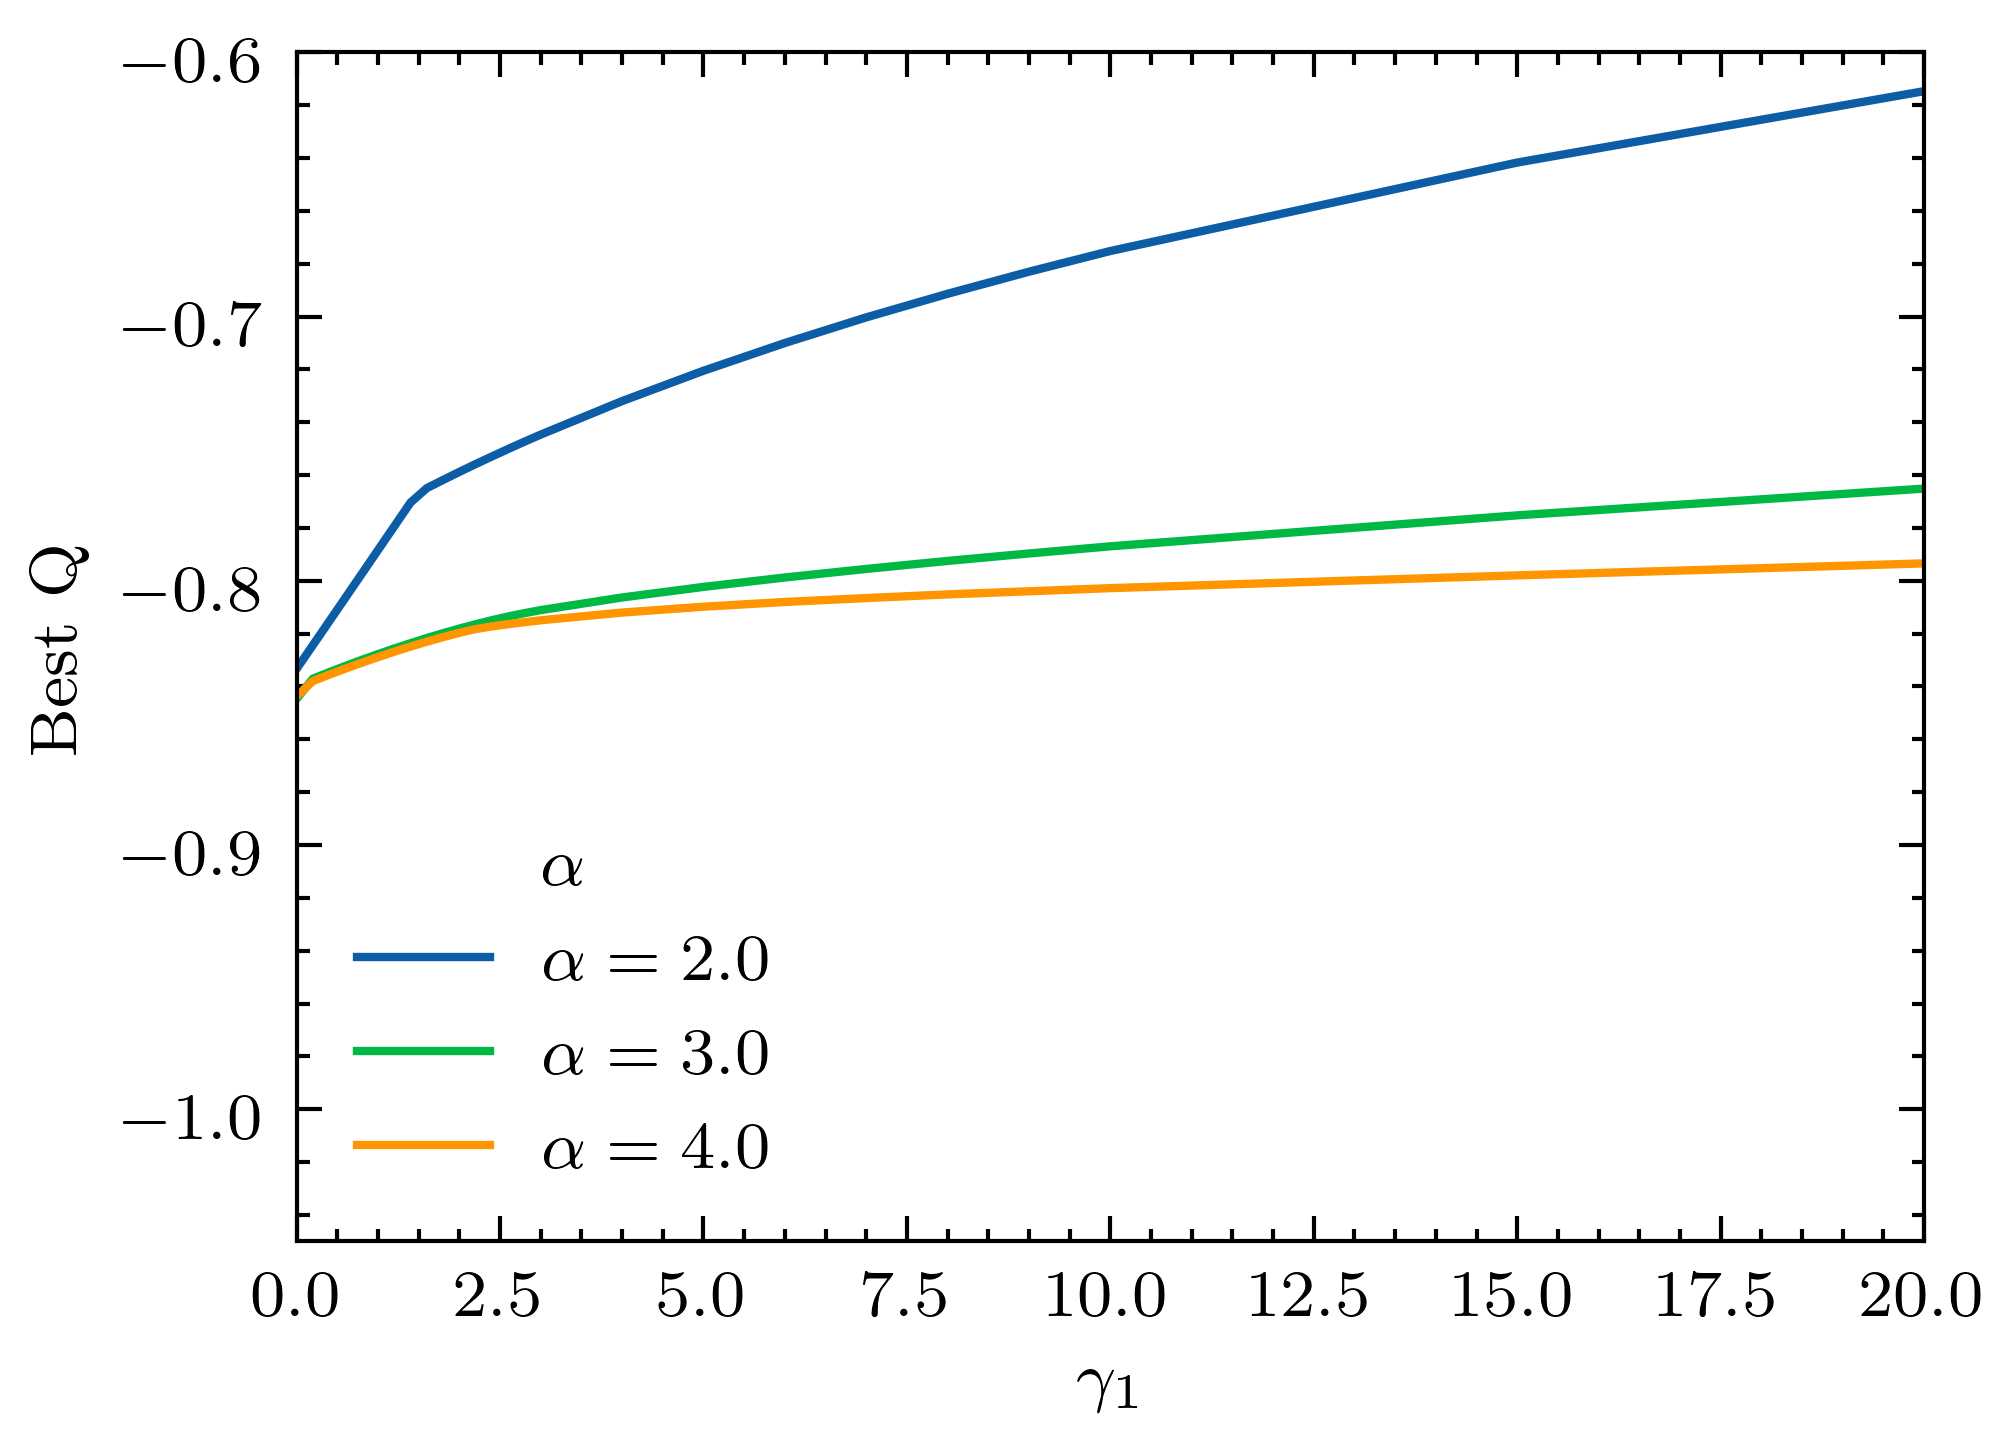

In [170]:
fig, ax = plt.subplots()

ax.plot(gam_list, bestQ_list_2, label="$\\alpha = 2.0$")
ax.plot(gam_list, bestQ_list_3, label="$\\alpha = 3.0$")
ax.plot(gam_list, bestQ_list_4, label="$\\alpha = 4.0$")

ax.set(xlabel="$\\gamma_1$")
ax.set(ylabel="Best Q")
# ax.legend(loc=0)
ax.legend(title = "$\\alpha$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-1.05, -0.6]);



fig.savefig("best_mandelQ_varying_gamma1.pdf")
fig.savefig("best_mandelQ_varying_gamma1.png", dpi=300)

TODO: calculate the photon-number expectation of one of the states when it reaches such best Q

In [171]:
mystates = ncl_decay(3.0, 15.0)

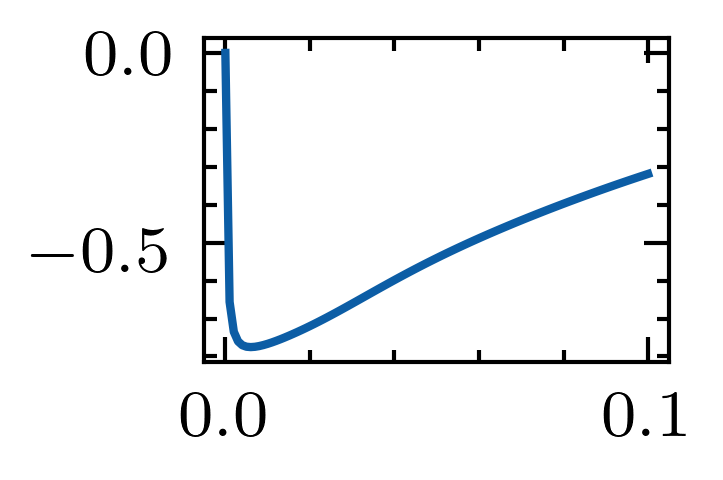

In [172]:
fig, ax = plt.subplots(figsize=(1, 1/1.4))

ax.plot(tlist, mandelQ(mystates))

In [173]:
min(mandelQ(mystates))

-0.7752338129125436

In [174]:
[idx for idx, val in enumerate(mandelQ(mystates)) if val == min(mandelQ(mystates))]

[6]

In [182]:
mandelQ(mystates[6])

-0.7752338129125436

In [175]:
qt.expect(n, mystates[6])

3.2497399082655

In [181]:
qt.variance(n, mystates)

array([8.99999998, 2.05988115, 1.29636024, 1.02057426, 0.87811238,
       0.79033897, 0.73043165, 0.68678053, 0.65352752, 0.62739503,
       0.60634488, 0.58908086, 0.57469632, 0.56255102, 0.55218065,
       0.54323961, 0.53545636, 0.52863451, 0.52262269, 0.51730153,
       0.5125745 , 0.50836102, 0.50459184, 0.50120596, 0.49814857,
       0.49536985, 0.49282424, 0.49047005, 0.48826923, 0.48618726,
       0.48419306, 0.48225891, 0.48036036, 0.47847606, 0.47658766,
       0.47467953, 0.47273861, 0.4707547 , 0.46871916, 0.4666247 ,
       0.46446692, 0.46224227, 0.45994909, 0.45758632, 0.45515402,
       0.45265294, 0.45008478, 0.44745161, 0.44475609, 0.4420009 ,
       0.43918921, 0.43632437, 0.43340974, 0.43044891, 0.42744522,
       0.42440213, 0.42132316, 0.41821158, 0.41507059, 0.41190334,
       0.40871281, 0.40550187, 0.40227323, 0.39902944, 0.39577293,
       0.39250608, 0.38923093, 0.3859495 , 0.38266367, 0.37937529,
       0.37608591, 0.37279718, 0.36951033, 0.36622678, 0.36294

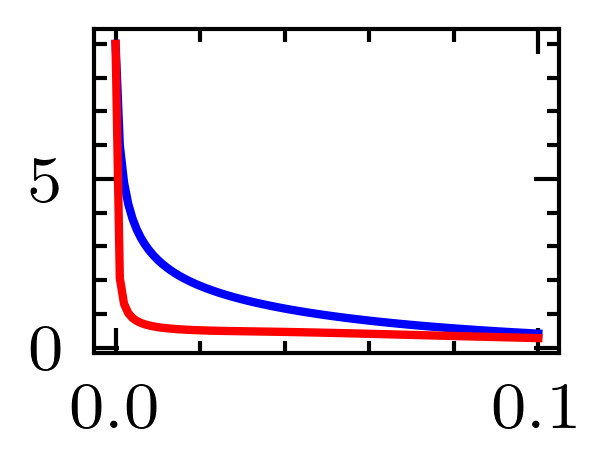

In [180]:
fig, ax = plt.subplots(figsize=(1, 1/1.4))

ax.plot(tlist, qt.expect(n, mystates), color="blue")
ax.plot(tlist, qt.variance(n, mystates), color="red")

## Graph of photon-number statistics

In [207]:
coh = qt.coherent_dm(N, np.sqrt(3.25), method="analytic")

In [208]:
_list = []
_myrange = np.arange(0, 20, 1)
for _n in _myrange:
    _list.append(coh.matrix_element(qt.fock(N, _n).trans(), qt.fock(N, _n)))

In [197]:
_list2 = []
for _n in _myrange:
    _list2.append(qt.ket2dm(qt.fock(N, 9)).matrix_element(qt.fock(N, _n).trans(), qt.fock(N, _n)))

In [202]:
_list3 = []
for _n in _myrange:
    _list3.append(mystates[6].matrix_element(qt.fock(N, _n).trans(), qt.fock(N, _n)))

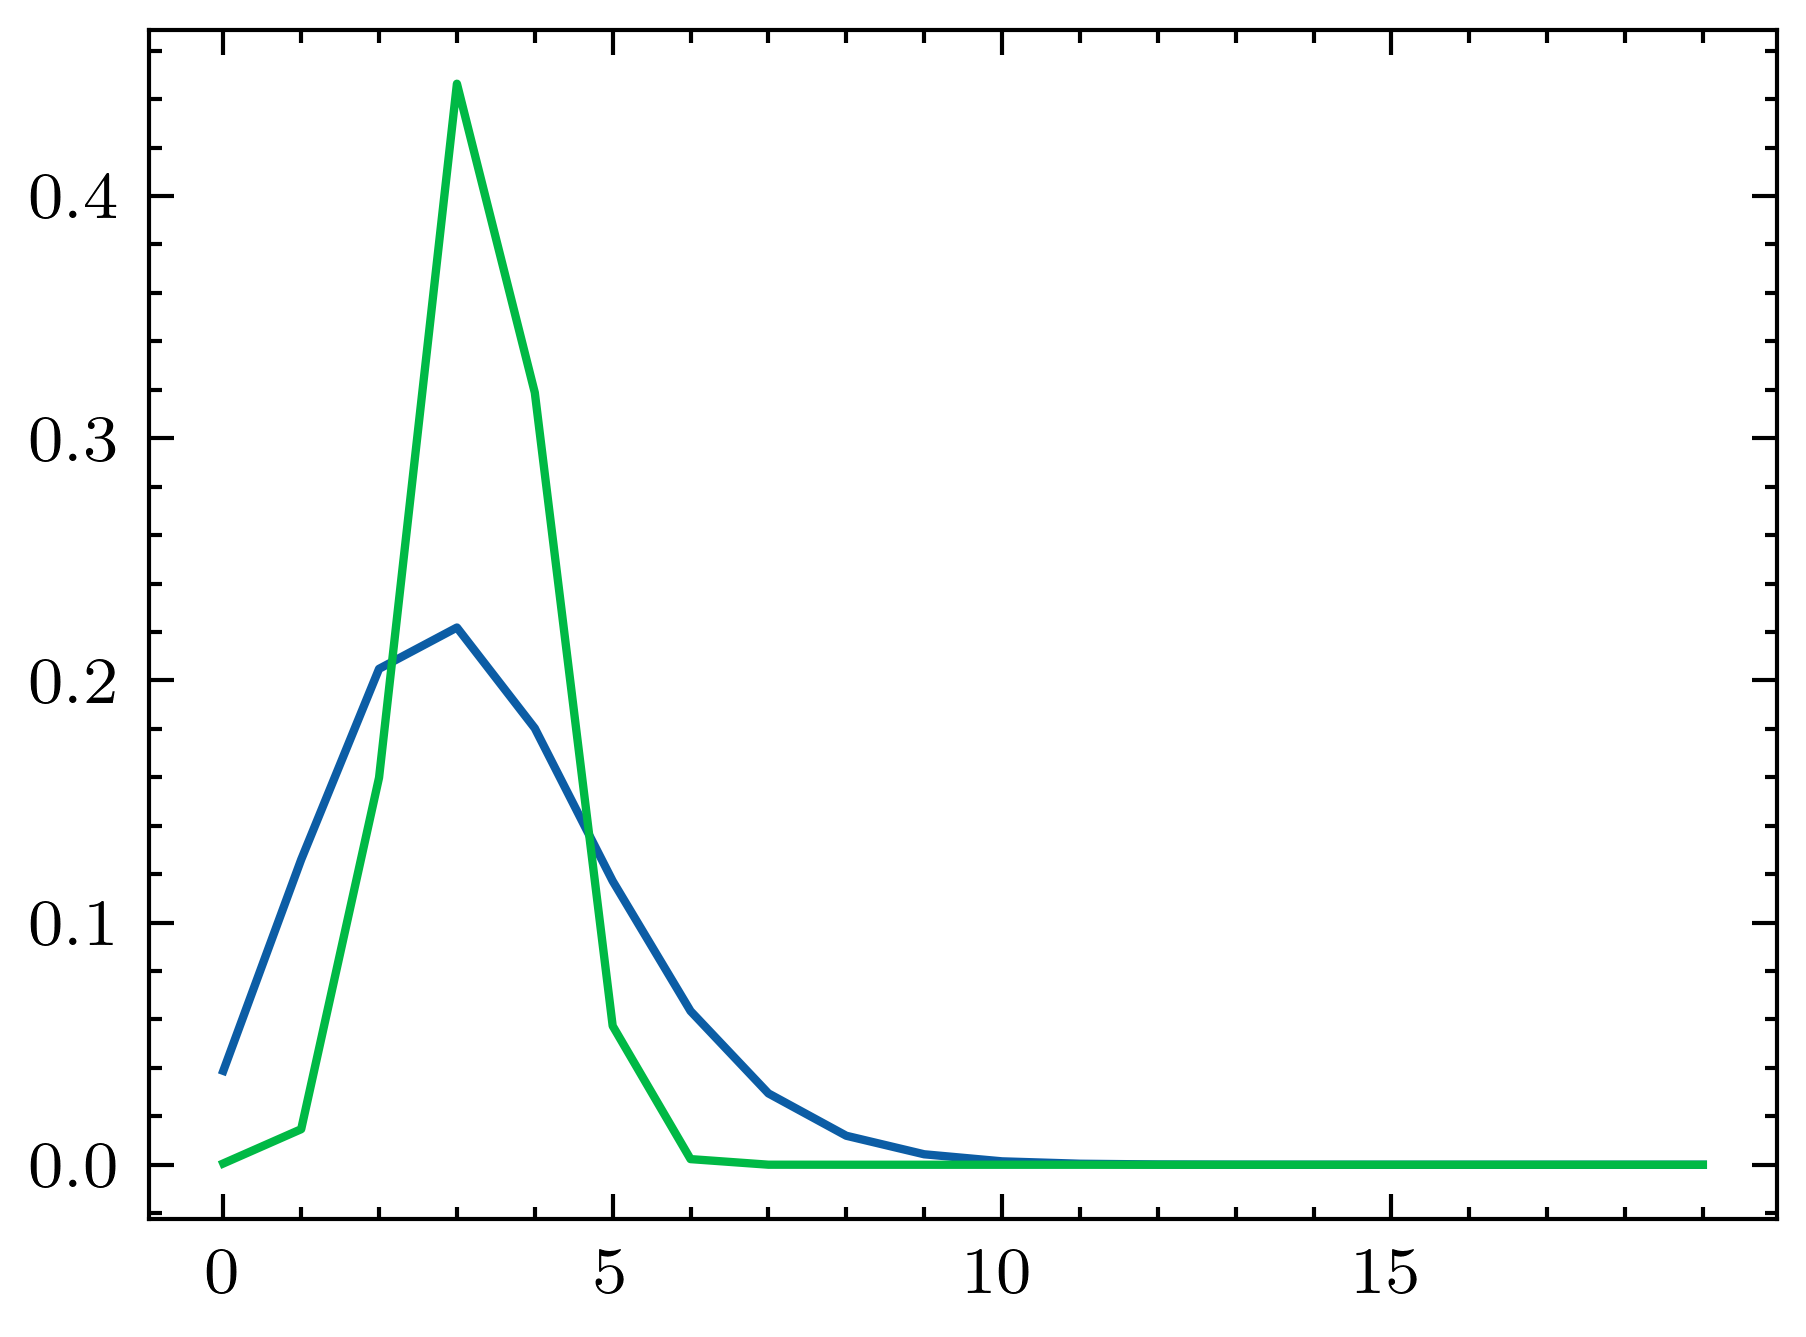

In [210]:
fig, ax = plt.subplots()

ax.plot(_myrange, _list)
# ax.plot(_myrange, _list2)
ax.plot(_myrange, _list3)

Ok, maybe I actually don't want to include it, it's kinda jankey.

# MC Solver

In [7]:
options = qt.Options()
N = 35
ntraj = 250
tlist = np.linspace(0, 1.0, 101) 
omega = 1.0 


# defining operators
a = qt.destroy(N) # annihilation
ad = a.dag() # creation
n = qt.num(N) # number
H = omega * ad * a # hamiltonian


def ncl_decay_mc(dims, alphain, gamma_1, gamma_3=8.0):
    
    psi0 = qt.coherent(N, alphain, method="analytic")
    coplist = [np.sqrt(gamma_3) * a * (n - 1), np.sqrt(gamma_1) * a]
    eoplist = [n, n**2]
    result = qt.mcsolve(H, psi0, tlist, c_ops=coplist, e_ops=[n], ntraj=250)
    return result



In [57]:
def single_mode_solver_1(dims, alphain, gamma_1, gamma_3=8.0, times = np.linspace(0, 1, 101)):
    ntraj = 250
    omega = 0
    
    # defining operators
    a = qt.destroy(dims) # annihilation
    ad = a.dag() # creation
    n = qt.num(dims) # number
    H = omega * ad * a # hamiltonian
    
    psi0 = qt.coherent(dims, alphain, method="analytic")
    coplist = [np.sqrt(gamma_3) * a * (n - 1), np.sqrt(gamma_1) * a]
    eoplist = [n, n**2]
    
    return qt.mcsolve(H, psi0, times, c_ops=coplist, e_ops=eoplist, ntraj=ntraj)

In [25]:
_test = single_mode_solver_1(35, 3.0, 0.0)

10.0%. Run time:  16.18s. Est. time left: 00:00:02:25
20.0%. Run time:  31.03s. Est. time left: 00:00:02:04
30.0%. Run time:  43.68s. Est. time left: 00:00:01:41
40.0%. Run time:  56.21s. Est. time left: 00:00:01:24
50.0%. Run time:  71.39s. Est. time left: 00:00:01:11
60.0%. Run time:  86.30s. Est. time left: 00:00:00:57
70.0%. Run time: 100.87s. Est. time left: 00:00:00:43
80.0%. Run time: 113.31s. Est. time left: 00:00:00:28
90.0%. Run time: 125.16s. Est. time left: 00:00:00:13
100.0%. Run time: 135.89s. Est. time left: 00:00:00:00
Total run time: 136.00s


In [26]:
def mandelQ_mc(_expects):
    """
    Input: The output from single_mode_solver_1.
    Output: mandelQ at every timestep
    """
    _n = _expects.expect[0]
    _n2 = _expects.expect[1]
    
    _num = _n2 - _n**2
    _denom = _n
    
    return (_num/_denom) - 1

In [81]:
def bestQ_mc(dims, alphain, gamma1, times = np.linspace(0, 0.1, 101), fileout=False):
    _solverout = single_mode_solver_1(dims, alphain, gamma1, times=times)
    _qlist = mandelQ_mc(_solverout)
    
    
    # let's save the qlist to file.
    if fileout==True:
        mydir = os.getcwd() + "\\bestQ\\"
        if not os.path.isdir(mydir):
            os.mkdir(mydir)
        myfile = "dims=" + str(dims) + ",alphain=" + str(alphain) + ",gamma1=" + str(gamma1) + ".dat"
        _dataout = np.vstack((times, _qlist))
        qt.file_data_store(mydir + myfile, _dataout.T, numtype="real", numformat="decimal", sep=",")
        
    return min(_qlist)

In [82]:
gam_list = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0])
len(gam_list)

25

In [83]:
# alpha = 2
bestQ_list_2 = []
alpha_test = 2.0
dims_test = 20
for idx, val in enumerate(gam_list):
    _newval = bestQ_mc(dims_test, alpha_test, val, fileout=True)
    bestQ_list_2.append(_newval)
    update_progress(idx / len(gam_list))
#     print(str(val) + "," + str(_newval))
    
update_progress(1)    

Progress: [####################] 100.0%


In [84]:
# alpha = 3
bestQ_list_3 = []
alpha_test = 3.0
dims_test = 20
for idx, val in enumerate(gam_list):
    _newval = bestQ_mc(dims_test, alpha_test, val, fileout=True)
    bestQ_list_3.append(_newval)
    update_progress(idx / len(gam_list))
#     print(str(val) + "," + str(_newval))
    
update_progress(1)    

Progress: [####################] 100.0%


In [85]:
# alpha = 4
bestQ_list_4 = []
alpha_test = 4.0
dims_test = 35
for idx, val in enumerate(gam_list):
    _newval = bestQ_mc(dims_test, alpha_test, val, fileout=True)
    bestQ_list_4.append(_newval)
    update_progress(idx / len(gam_list))
#     print(str(val) + "," + str(_newval))
    
update_progress(1)    

Progress: [####################] 100.0%


In [ ]:
# alpha = 10
bestQ_list_10 = []
alpha_test = 10.0
dims_test = 200
for idx, val in enumerate(gam_list):
    _newval = bestQ_mc(dims_test, alpha_test, val, fileout=True)
    bestQ_list_10.append(_newval)
    update_progress(idx / len(gam_list))
#     print(str(val) + "," + str(_newval))
    
update_progress(1)    

Progress: [##------------------] 12.0%
10.0%. Run time: 1307.76s. Est. time left: 00:03:16:09
20.0%. Run time: 2506.01s. Est. time left: 00:02:47:04
30.0%. Run time: 3737.06s. Est. time left: 00:02:25:19
40.0%. Run time: 5045.48s. Est. time left: 00:02:06:08
50.0%. Run time: 6224.08s. Est. time left: 00:01:43:44
60.0%. Run time: 7348.54s. Est. time left: 00:01:21:39
70.0%. Run time: 8486.66s. Est. time left: 00:01:00:37


In [ ]:
# alpha = 20
bestQ_list_20 = []
alpha_test = 20.0
dims_test = 500
for idx, val in enumerate(gam_list):
    _newval = bestQ_mc(dims_test, alpha_test, val, fileout=True)
    bestQ_list_20.append(_newval)
    update_progress(idx / len(gam_list))
#     print(str(val) + "," + str(_newval))
    
update_progress(1)    

# Signature effects

I will use the same solver as in "OneDrive for Business/Year 3/PhoG/PhoG_paper/Calculations/Single mode master equation-Copy1.ipynb"

- [x] check how long it takes to run with sensible parameters (to reproduce Fig.3 from paper)
- [x] if I set Hamitonian to zero does it make a difference?

## Checking the above two things:

In [7]:
times = np.linspace(0, 0.02, 100)

In [35]:
def single_mode_solver(method, dims, alpha_in, gamma_1, Gamma, U, times = np.linspace(0, 0.02, 100)):
    sigma_1 = (3 * U) / 8 
    sigma_2 = U / 2
    sigma_3 = (-3 * U) / 8 
    gamma_2 = (U**2)/(16 * (Gamma + gamma_1))
    gamma_3 = (U**2)/(4 * (Gamma + gamma_1))
    
    psi0 = qt.coherent(dims, alpha_in, method="analytic")
#     times = np.linspace(0, 10, 100)

    s_minus = qt.destroy(dims)
    n_minus = s_minus.dag() * s_minus
    c_op_list = [np.sqrt(gamma_1) * s_minus, np.sqrt(gamma_2) * s_minus**2, np.sqrt(gamma_3) *  n_minus * s_minus]
    H = sigma_1 * (n_minus**2) + sigma_3 * n_minus # possibly I need to scale H by hbar or something
#     e_op_list = []

#     opts = Options()
#     opts.nsteps = 3000
    if method == "me":
        rho0 = qt.ket2dm(psi0)
        e_op_list = []
        return qt.mesolve(H, rho0, times, c_op_list, e_op_list).states
    elif method == "mc":
#         ntraj = 500
        e_op_list = [n_minus]
        return qt.mcsolve(H, psi0, times, c_op_list, [n_minus, n_minus**2], ntraj=250)

In [36]:
sol100 = single_mode_solver("mc", 140, 10.0, 0.0, 432.0, 2.0)

10.0%. Run time:   5.85s. Est. time left: 00:00:00:52
20.0%. Run time:   7.13s. Est. time left: 00:00:00:28
30.0%. Run time:   8.49s. Est. time left: 00:00:00:19
40.0%. Run time:   9.90s. Est. time left: 00:00:00:14
50.0%. Run time:  11.12s. Est. time left: 00:00:00:11
60.0%. Run time:  12.58s. Est. time left: 00:00:00:08
70.0%. Run time:  14.01s. Est. time left: 00:00:00:06
80.0%. Run time:  15.39s. Est. time left: 00:00:00:03
90.0%. Run time:  16.93s. Est. time left: 00:00:00:01
100.0%. Run time:  18.31s. Est. time left: 00:00:00:00
Total run time:  18.41s


In [37]:
sol300 = single_mode_solver("mc", 364, np.sqrt(300), 0.0, 432.0, 2.0)

10.0%. Run time:  11.62s. Est. time left: 00:00:01:44
20.0%. Run time:  17.78s. Est. time left: 00:00:01:11
30.0%. Run time:  24.61s. Est. time left: 00:00:00:57
40.0%. Run time:  31.11s. Est. time left: 00:00:00:46
50.0%. Run time:  38.30s. Est. time left: 00:00:00:38
60.0%. Run time:  46.00s. Est. time left: 00:00:00:30
70.0%. Run time:  53.67s. Est. time left: 00:00:00:23
80.0%. Run time:  60.56s. Est. time left: 00:00:00:15
90.0%. Run time:  67.32s. Est. time left: 00:00:00:07
100.0%. Run time:  74.18s. Est. time left: 00:00:00:00
Total run time:  74.30s


In [38]:
sol500 = single_mode_solver("mc", 581, np.sqrt(500), 0.0, 432.0, 2.0)

10.0%. Run time:  20.64s. Est. time left: 00:00:03:05
20.0%. Run time:  34.51s. Est. time left: 00:00:02:18
30.0%. Run time:  48.79s. Est. time left: 00:00:01:53
40.0%. Run time:  64.26s. Est. time left: 00:00:01:36
50.0%. Run time:  85.94s. Est. time left: 00:00:01:25
60.0%. Run time:  99.86s. Est. time left: 00:00:01:06
70.0%. Run time: 113.72s. Est. time left: 00:00:00:48
80.0%. Run time: 129.33s. Est. time left: 00:00:00:32
90.0%. Run time: 144.81s. Est. time left: 00:00:00:16
100.0%. Run time: 163.29s. Est. time left: 00:00:00:00
Total run time: 163.52s


In [39]:
sol700 = single_mode_solver("mc", 794, np.sqrt(700), 0.0, 432.0, 2.0)

10.0%. Run time:  32.91s. Est. time left: 00:00:04:56
20.0%. Run time:  54.74s. Est. time left: 00:00:03:38
30.0%. Run time:  74.92s. Est. time left: 00:00:02:54
40.0%. Run time:  95.02s. Est. time left: 00:00:02:22
50.0%. Run time: 120.23s. Est. time left: 00:00:02:00
60.0%. Run time: 139.74s. Est. time left: 00:00:01:33
70.0%. Run time: 160.66s. Est. time left: 00:00:01:08
80.0%. Run time: 180.62s. Est. time left: 00:00:00:45
90.0%. Run time: 201.47s. Est. time left: 00:00:00:22
100.0%. Run time: 222.30s. Est. time left: 00:00:00:00
Total run time: 222.48s


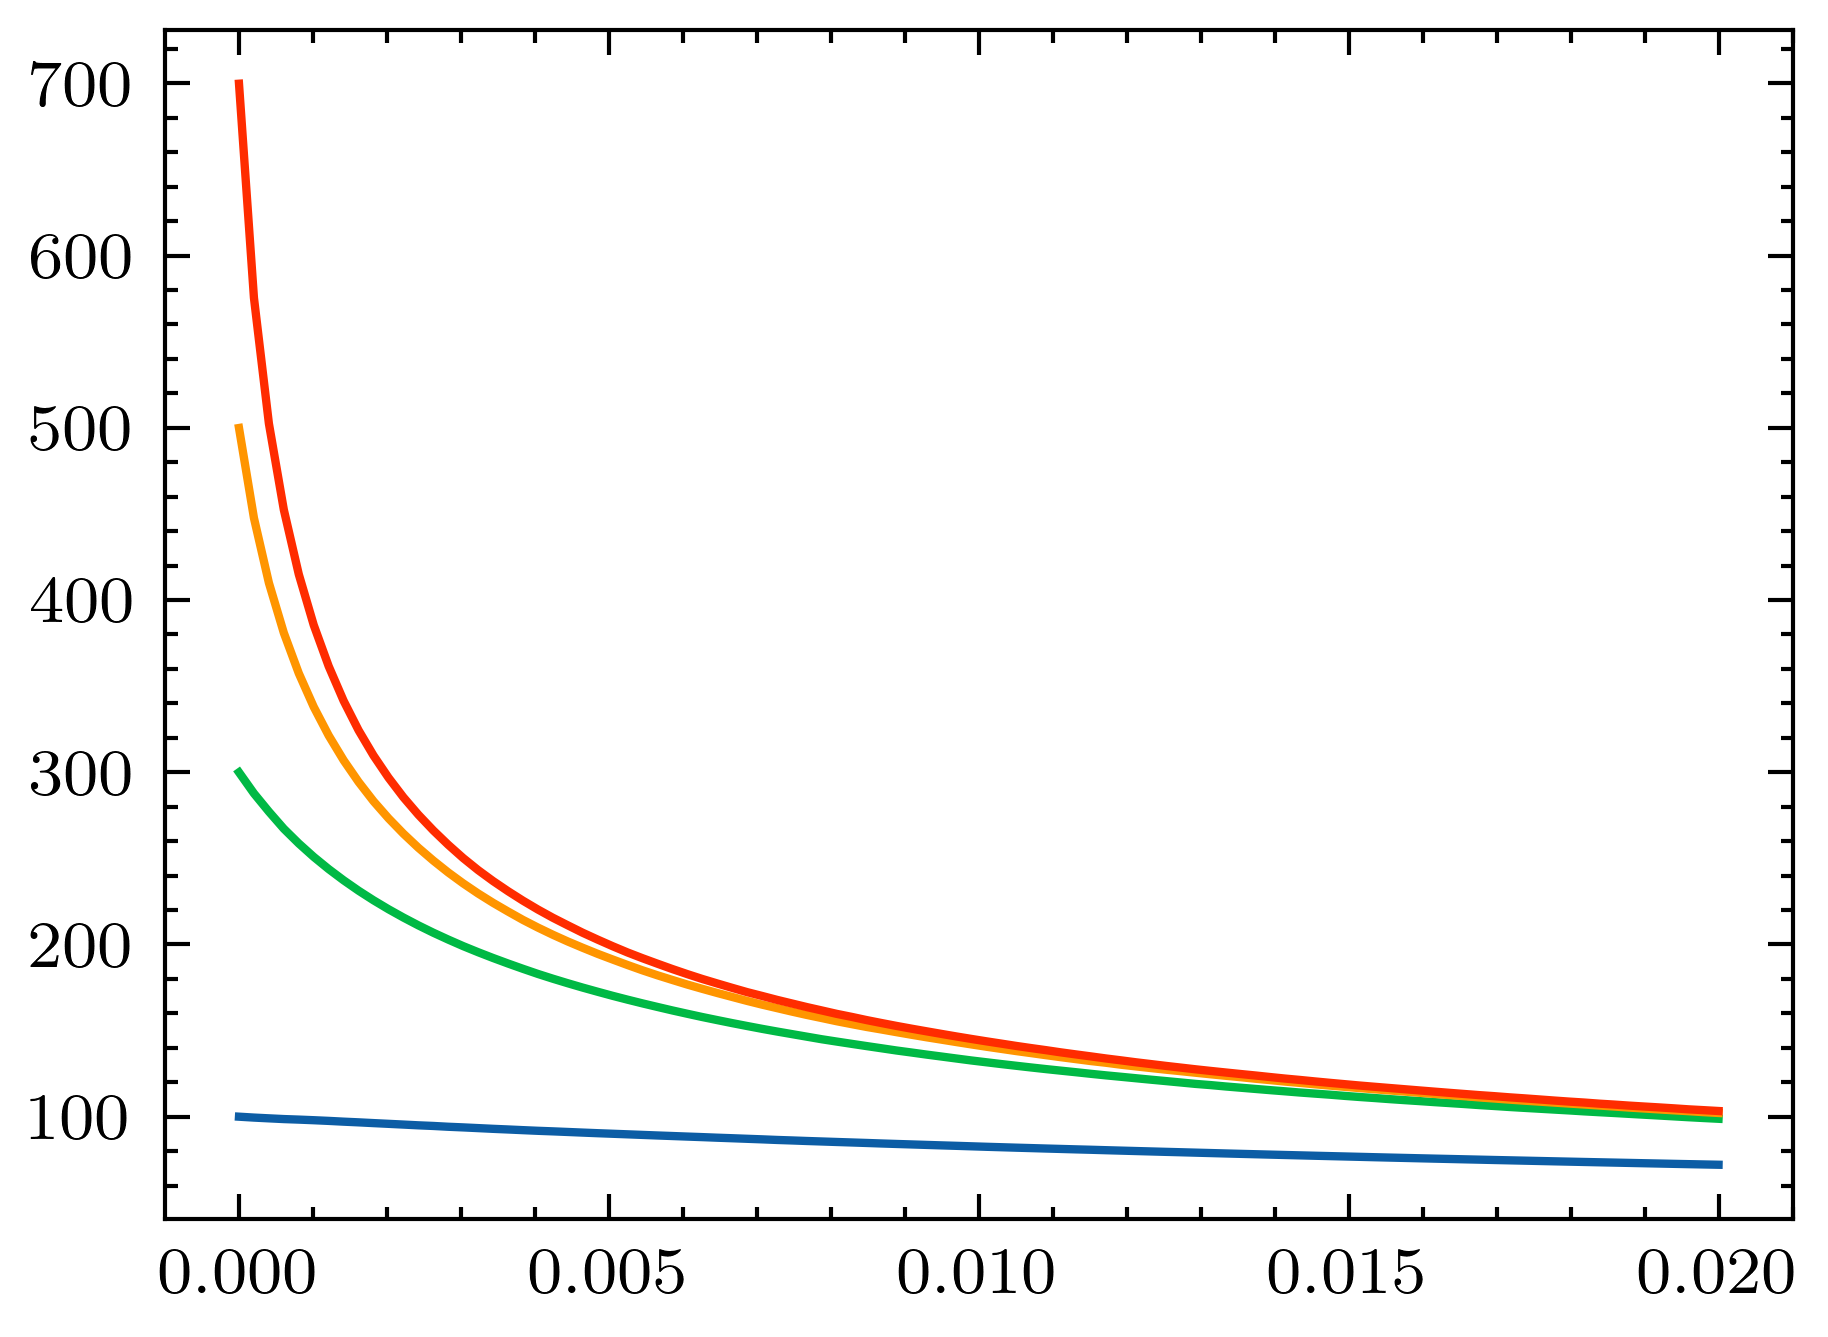

In [22]:
fig, ax = plt.subplots()

ax.plot(times, sol100.expect[0])
ax.plot(times, sol300.expect[0])
ax.plot(times, sol500.expect[0])
ax.plot(times, sol700.expect[0])

In [40]:
def single_mode_solver_modified(method, dims, alpha_in, gamma_1, gamma_2, gamma_3, times=np.linspace(0, 0.02, 100)):
    
    # parameters
    omega = 0
    ntraj = 250
    
    # input state
    psi0 = qt.coherent(dims, alpha_in, method="analytic")
    
    # defining operators
    a = qt.destroy(dims)
    ad = a.dag()
    n = qt.num(dims)
    
    # collapse operators
    c_op_list = [np.sqrt(gamma_1) * a, np.sqrt(gamma_2) * a * a, np.sqrt(gamma_3) * a * (n-1)]
    
    # Hamiltonian
    H = omega * ad * a
    
    if method == "me":
        rho0 = qt.ket2dm(psi0)
        e_op_list = []
        return qt.mesolve(H, rho0, times, c_op_list, e_op_list).states
    elif method == "mc":
        e_op_list = [n, n**2]
        return qt.mcsolve(H, psi0, times, c_op_list, e_op_list, ntraj=ntraj)

In [26]:
def param2gamma2(U, Gamma, gamma_1):
    gamma_2 = (U**2)/(16 * (Gamma + gamma_1))
    return gamma_2

def param2gamma3(U, Gamma, gamma_1):
    gamma_3 = (U**2)/(4 * (Gamma + gamma_1))
    return gamma_3

gamma_2_test = param2gamma2(2.0, 432, 0)
gamma_3_test = param2gamma3(2.0, 430, 0)

In [41]:
sol100_modified = single_mode_solver_modified("mc", 140, 10, 0.0, gamma_2_test, gamma_3_test)
sol300_modified = single_mode_solver_modified("mc", 364, np.sqrt(300), 0.0, gamma_2_test, gamma_3_test)
sol500_modified = single_mode_solver_modified("mc", 581, np.sqrt(500), 0.0, gamma_2_test, gamma_3_test)
sol700_modified = single_mode_solver_modified("mc", 794, np.sqrt(700), 0.0, gamma_2_test, gamma_3_test)

10.0%. Run time:   4.92s. Est. time left: 00:00:00:44
20.0%. Run time:   5.46s. Est. time left: 00:00:00:21
30.0%. Run time:   5.99s. Est. time left: 00:00:00:13
40.0%. Run time:   6.57s. Est. time left: 00:00:00:09
50.0%. Run time:   7.12s. Est. time left: 00:00:00:07
60.0%. Run time:   7.67s. Est. time left: 00:00:00:05
70.0%. Run time:   8.23s. Est. time left: 00:00:00:03
80.0%. Run time:   8.78s. Est. time left: 00:00:00:02
90.0%. Run time:   9.35s. Est. time left: 00:00:00:01
100.0%. Run time:   9.90s. Est. time left: 00:00:00:00
Total run time:  10.02s
10.0%. Run time:   9.04s. Est. time left: 00:00:01:21
20.0%. Run time:  13.87s. Est. time left: 00:00:00:55
30.0%. Run time:  18.22s. Est. time left: 00:00:00:42
40.0%. Run time:  22.79s. Est. time left: 00:00:00:34
50.0%. Run time:  27.51s. Est. time left: 00:00:00:27
60.0%. Run time:  33.90s. Est. time left: 00:00:00:22
70.0%. Run time:  38.53s. Est. time left: 00:00:00:16
80.0%. Run time:  43.73s. Est. time left: 00:00:00:10
90.

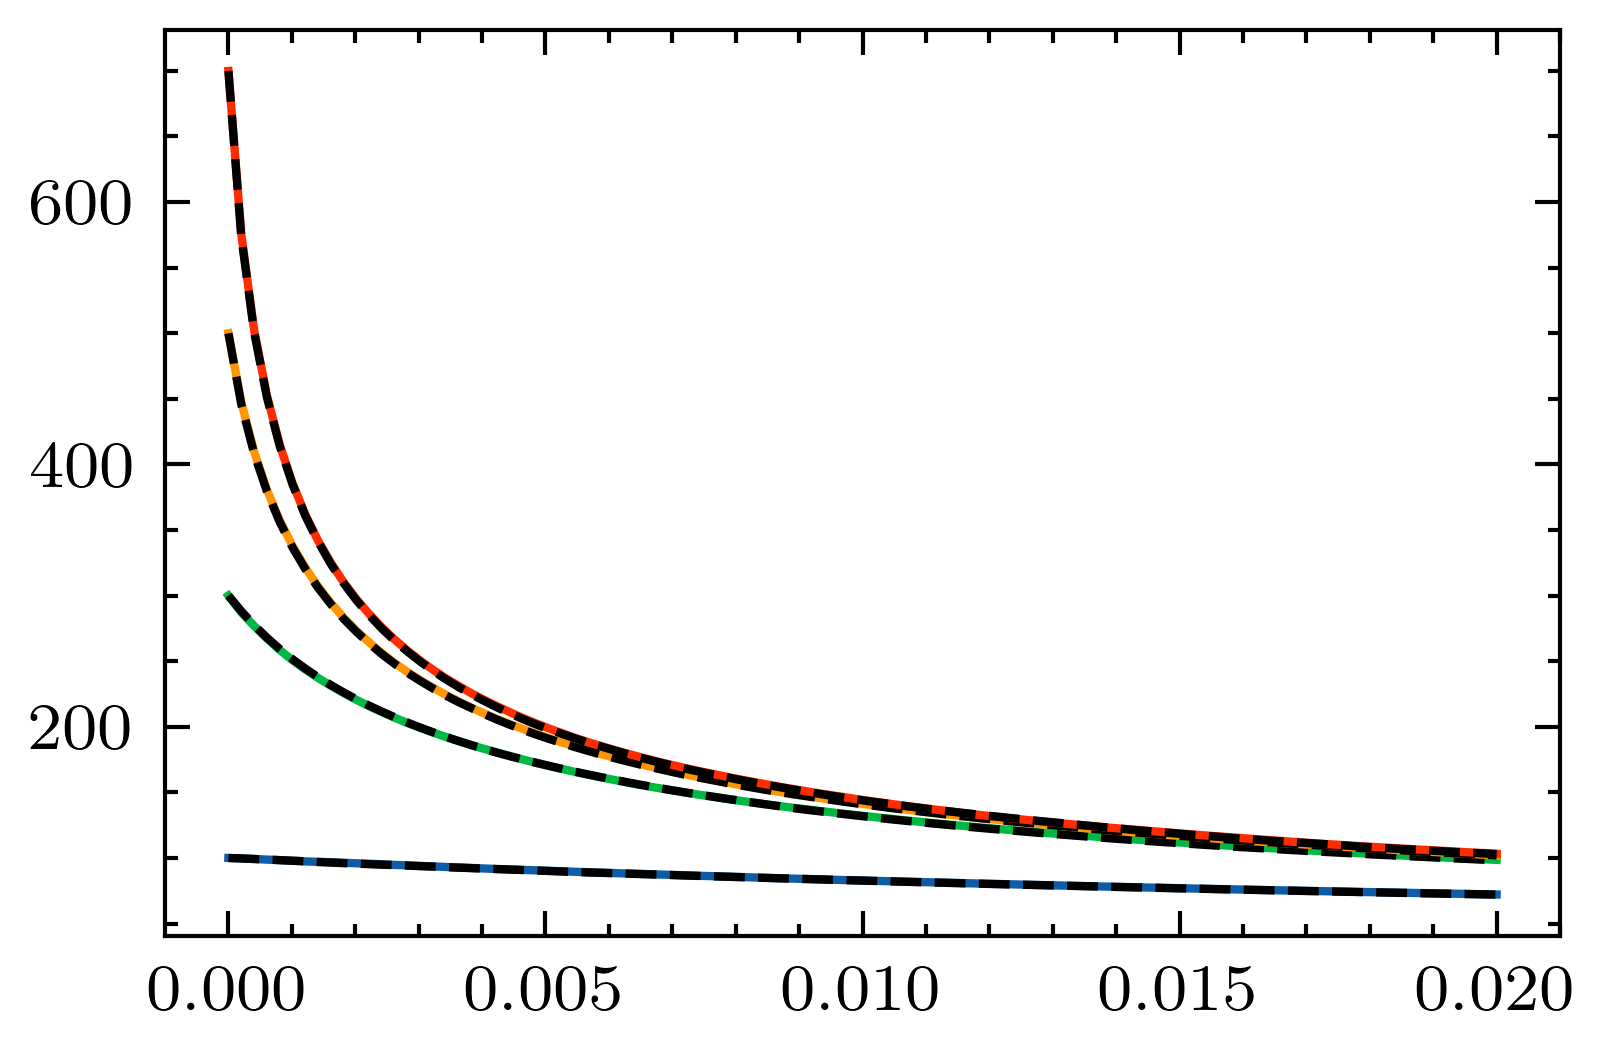

In [44]:
fig, ax = plt.subplots(figsize=(3, 2))

ax.plot(times, sol100.expect[0])
ax.plot(times, sol100_modified.expect[0], linestyle="--", color="black")

ax.plot(times, sol300.expect[0])
ax.plot(times, sol300_modified.expect[0], linestyle="--", color="black")

ax.plot(times, sol500.expect[0])
ax.plot(times, sol500_modified.expect[0], linestyle="--", color="black")

ax.plot(times, sol700.expect[0])
ax.plot(times, sol700_modified.expect[0], linestyle="--", color="black")



In [45]:
def mandelQ(expectin): 
    """
    Input: output of single_mode_solver (or single_mode_solver_modified)
    Output: mandel Q parameter at each timestep
    """
    
    _num = expectin.expect[1] - expectin.expect[0]**2
    _denom = expectin.expect[0]
    
    return (_num/_denom)-1

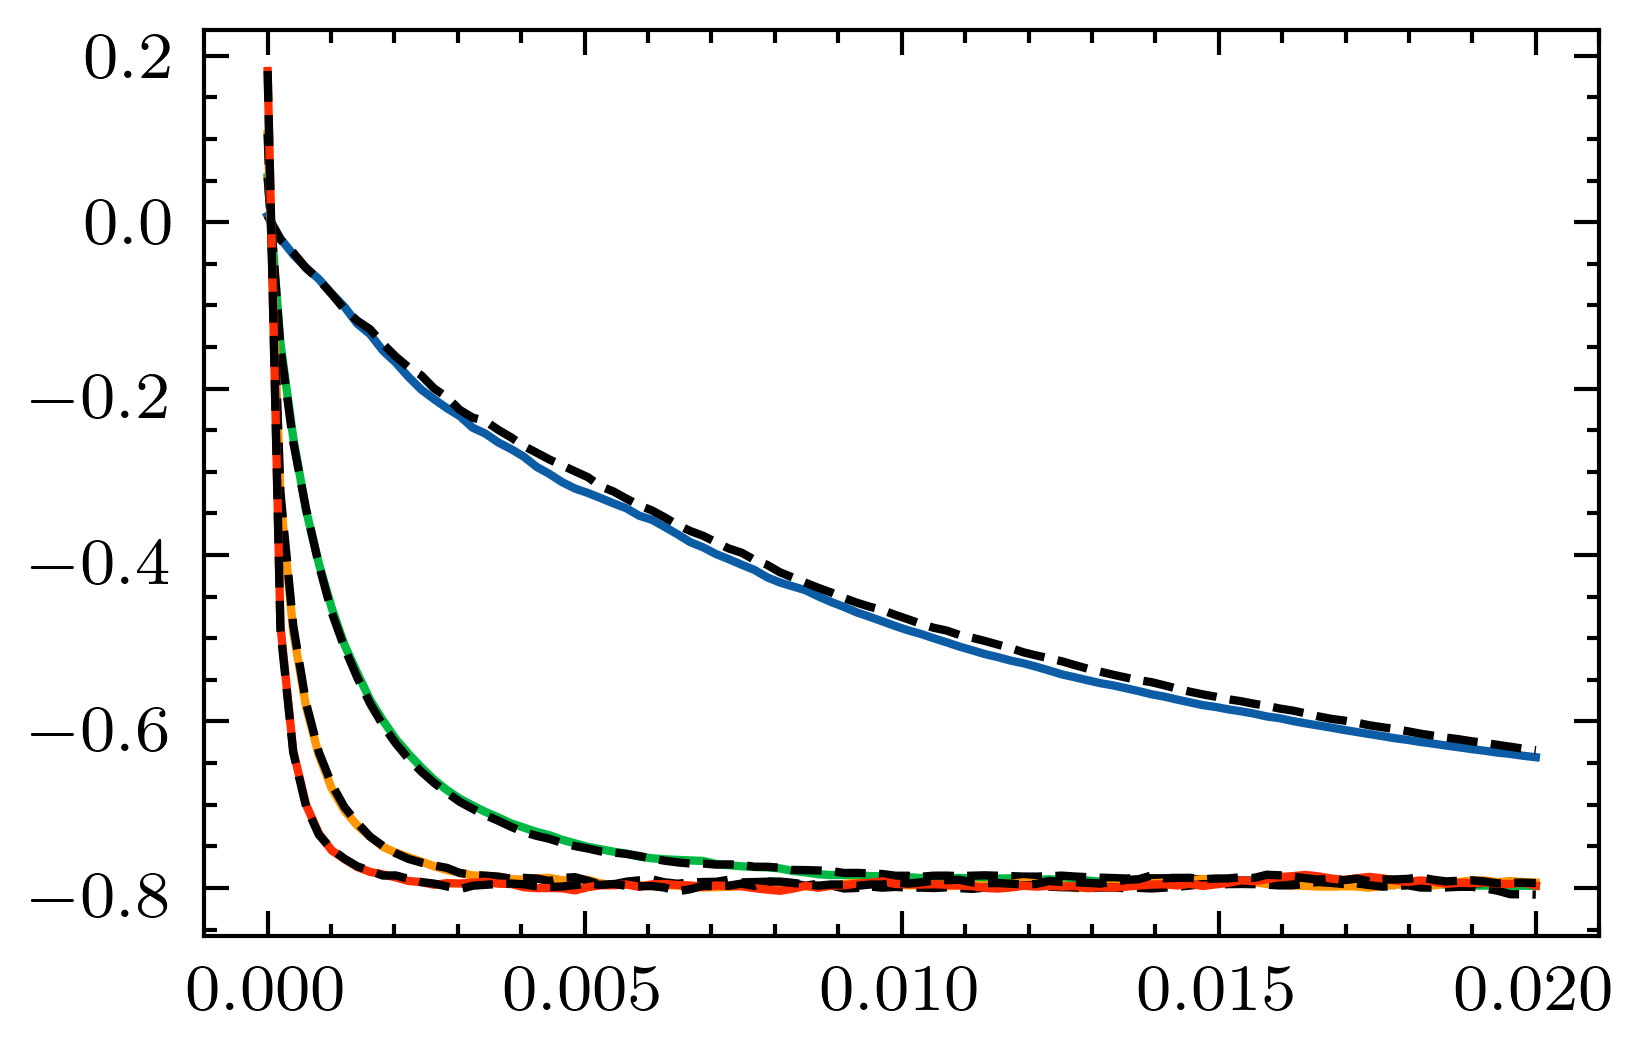

In [47]:
fig, ax = plt.subplots(figsize=(3,2))

ax.plot(times, mandelQ(sol100))
ax.plot(times, mandelQ(sol100_modified), linestyle="--", color="black")

ax.plot(times, mandelQ(sol300))
ax.plot(times, mandelQ(sol300_modified), linestyle="--", color="black")

ax.plot(times, mandelQ(sol500))
ax.plot(times, mandelQ(sol500_modified), linestyle="--", color="black")

ax.plot(times, mandelQ(sol700))
ax.plot(times, mandelQ(sol700_modified), linestyle="--", color="black")

## Actually making graphs

Reproducing Fig.3

In [5]:
def single_mode_solver_modified(method, dims, alpha_in, gamma_1, gamma_2, gamma_3, times=np.linspace(0, 0.02, 100)):
    
    # parameters
    omega = 0
    ntraj = 500
    
    # input state
    psi0 = qt.coherent(dims, alpha_in, method="analytic")
    
    # defining operators
    a = qt.destroy(dims)
    ad = a.dag()
    n = qt.num(dims)
    
    # collapse operators
    c_op_list = [np.sqrt(gamma_1) * a, np.sqrt(gamma_2) * a * a, np.sqrt(gamma_3) * a * (n-1)]
    
    # Hamiltonian
    H = omega * ad * a
    
    if method == "me":
        rho0 = qt.ket2dm(psi0)
        e_op_list = []
        return qt.mesolve(H, rho0, times, c_op_list, e_op_list).states
    elif method == "mc":
        e_op_list = [n, n**2]
        return qt.mcsolve(H, psi0, times, c_op_list, e_op_list, ntraj=ntraj)

In [6]:
def param2gamma2(U, Gamma, gamma_1):
    gamma_2 = (U**2)/(16 * (Gamma + gamma_1))
    return gamma_2

def param2gamma3(U, Gamma, gamma_1):
    gamma_3 = (U**2)/(4 * (Gamma + gamma_1))
    return gamma_3

gamma_2_test = param2gamma2(2.0, 432, 0)
gamma_3_test = param2gamma3(2.0, 430, 0)

In [7]:
def mandelQ(expectin): 
    """
    Input: output of single_mode_solver (or single_mode_solver_modified)
    Output: mandel Q parameter at each timestep
    """
    
    _num = expectin.expect[1] - expectin.expect[0]**2
    _denom = expectin.expect[0]
    
    return (_num/_denom)-1

In [51]:
gamma_2_test = param2gamma2(2, 432, 0)
gamma_3_test = param2gamma3(2, 432, 0)

### NL Decay, $\gamma_1=0$

In [ ]:
# single_mode_solver_modified(method, dims, alpha_in, gamma_1, gamma_2, gamma_3, times=np.linspace(0, 0.02, 100)):

In [ ]:
sol100 = single_mode_solver_modified("mc", 140, 10, 0.0, gamma_2_test, gamma_3_test)
sol300 = single_mode_solver_modified("mc", 364, np.sqrt(300), 0.0, gamma_2_test, gamma_3_test)
sol500 = single_mode_solver_modified("mc", 581, np.sqrt(500), 0.0, gamma_2_test, gamma_3_test)

sol700 = single_mode_solver_modified("mc", 794, np.sqrt(700), 0.0, gamma_2_test, gamma_3_test)

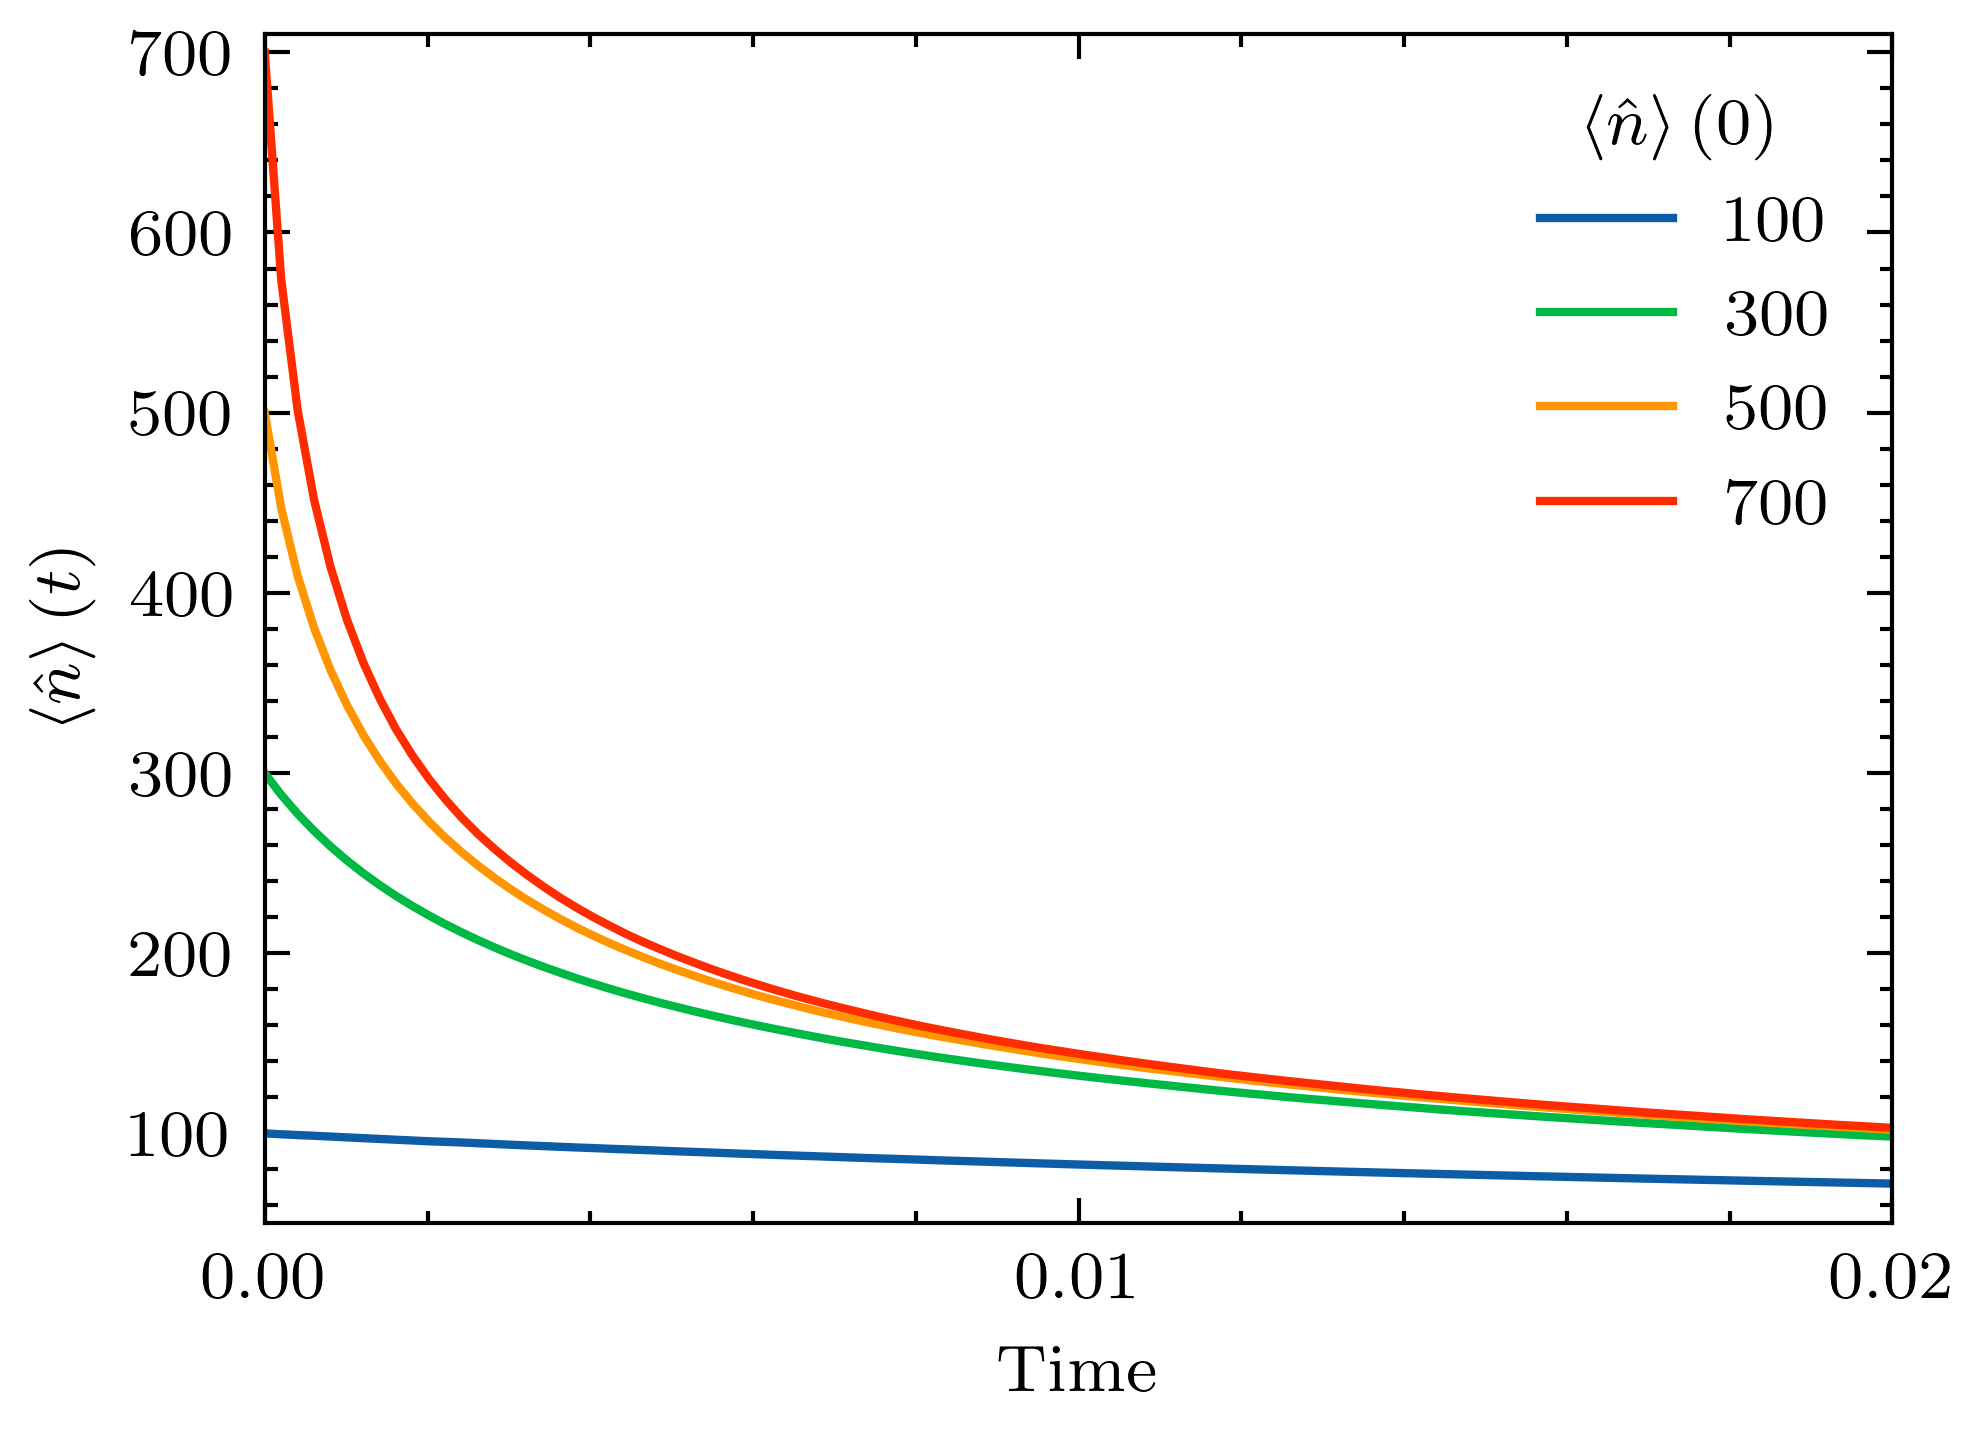

In [77]:
fig, ax = plt.subplots()

ax.plot(times, sol100.expect[0], label="100")
ax.plot(times, sol300.expect[0], label="300")
ax.plot(times, sol500.expect[0], label="500")
ax.plot(times, sol700.expect[0], label="700")


ax.set(xlabel="Time")
ax.set(ylabel="$\\langle \\hat{n} \\rangle \\left(t\\right)$")
# ax.legend(loc=0)
ax.legend(title = "$\\langle \\hat{n} \\rangle\\left(0\\right)$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([50, 710]);

plt.xticks([0.00, 0.01, 0.02]);

# fig.savefig("NL_decay_paper_fig3_noloss_varalpha.pdf")
# fig.savefig("NL_decay_paper_fig3_noloss_varalpha.png", dpi=300)

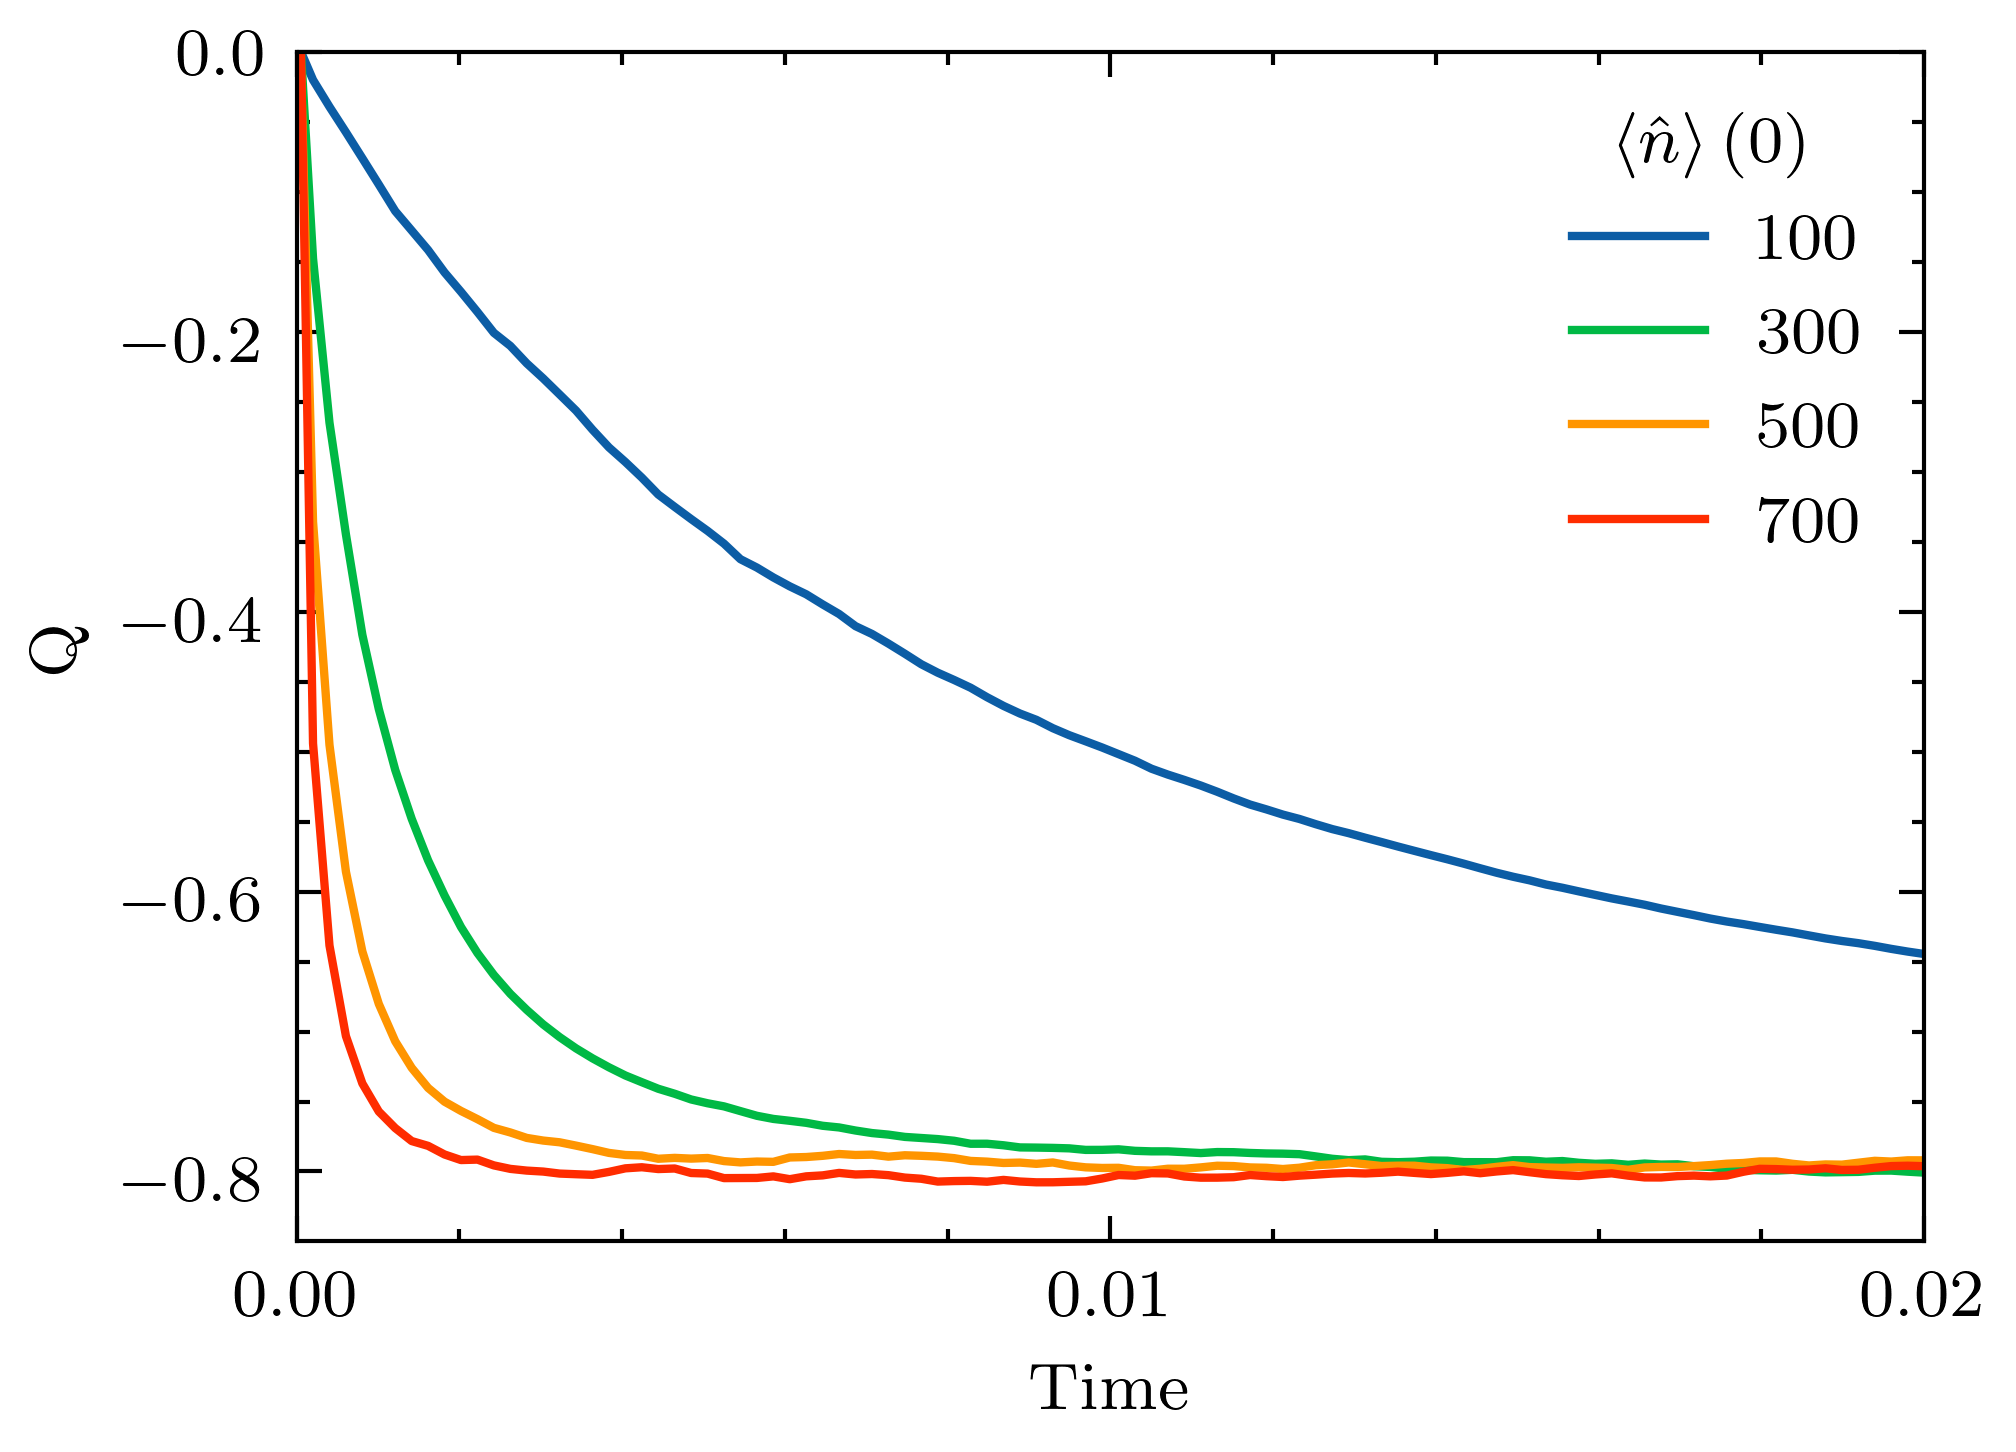

In [86]:
fig, ax = plt.subplots()

ax.plot(times, mandelQ(sol100), label="100")
ax.plot(times, mandelQ(sol300), label="300")
ax.plot(times, mandelQ(sol500), label="500")
ax.plot(times, mandelQ(sol700), label="700")


ax.set(xlabel="Time")
ax.set(ylabel="Q")
# ax.legend(loc=0)
ax.legend(title = "$\\langle \\hat{n} \\rangle\\left(0\\right)$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-0.85, 0.0]);

plt.xticks([0.0, 0.01, 0.02]);

fig.savefig("Q_paper_fig3_noloss_varalpha.pdf")
fig.savefig("Q_paper_fig3_noloss_varalpha.png", dpi=300)

### Q, $\alpha$ constant, varying $\gamma_1$

In [87]:
gamma_2_test = param2gamma2(2, 432, 0)
gamma_3_test = param2gamma3(2, 432, 0)

In [88]:
sol500_0 = single_mode_solver_modified("mc", 581, np.sqrt(500), 0.0, gamma_2_test, gamma_3_test)
sol500_20 = single_mode_solver_modified("mc", 581, np.sqrt(500), 20.0, gamma_2_test, gamma_3_test)
sol500_200 = single_mode_solver_modified("mc", 581, np.sqrt(500), 200.0, gamma_2_test, gamma_3_test)
sol500_400 = single_mode_solver_modified("mc", 581, np.sqrt(500), 400.0, gamma_2_test, gamma_3_test)


10.0%. Run time:  28.40s. Est. time left: 00:00:04:15
20.0%. Run time:  50.93s. Est. time left: 00:00:03:23
30.0%. Run time:  71.58s. Est. time left: 00:00:02:47
40.0%. Run time:  90.89s. Est. time left: 00:00:02:16
50.0%. Run time: 110.52s. Est. time left: 00:00:01:50
60.0%. Run time: 129.41s. Est. time left: 00:00:01:26
70.0%. Run time: 149.05s. Est. time left: 00:00:01:03
80.0%. Run time: 168.80s. Est. time left: 00:00:00:42
90.0%. Run time: 188.56s. Est. time left: 00:00:00:20
100.0%. Run time: 207.84s. Est. time left: 00:00:00:00
Total run time: 207.98s
10.0%. Run time:  24.81s. Est. time left: 00:00:03:43
20.0%. Run time:  45.62s. Est. time left: 00:00:03:02
30.0%. Run time:  65.79s. Est. time left: 00:00:02:33
40.0%. Run time:  87.79s. Est. time left: 00:00:02:11
50.0%. Run time: 109.06s. Est. time left: 00:00:01:49
60.0%. Run time: 129.91s. Est. time left: 00:00:01:26
70.0%. Run time: 150.26s. Est. time left: 00:00:01:04
80.0%. Run time: 171.05s. Est. time left: 00:00:00:42
90.

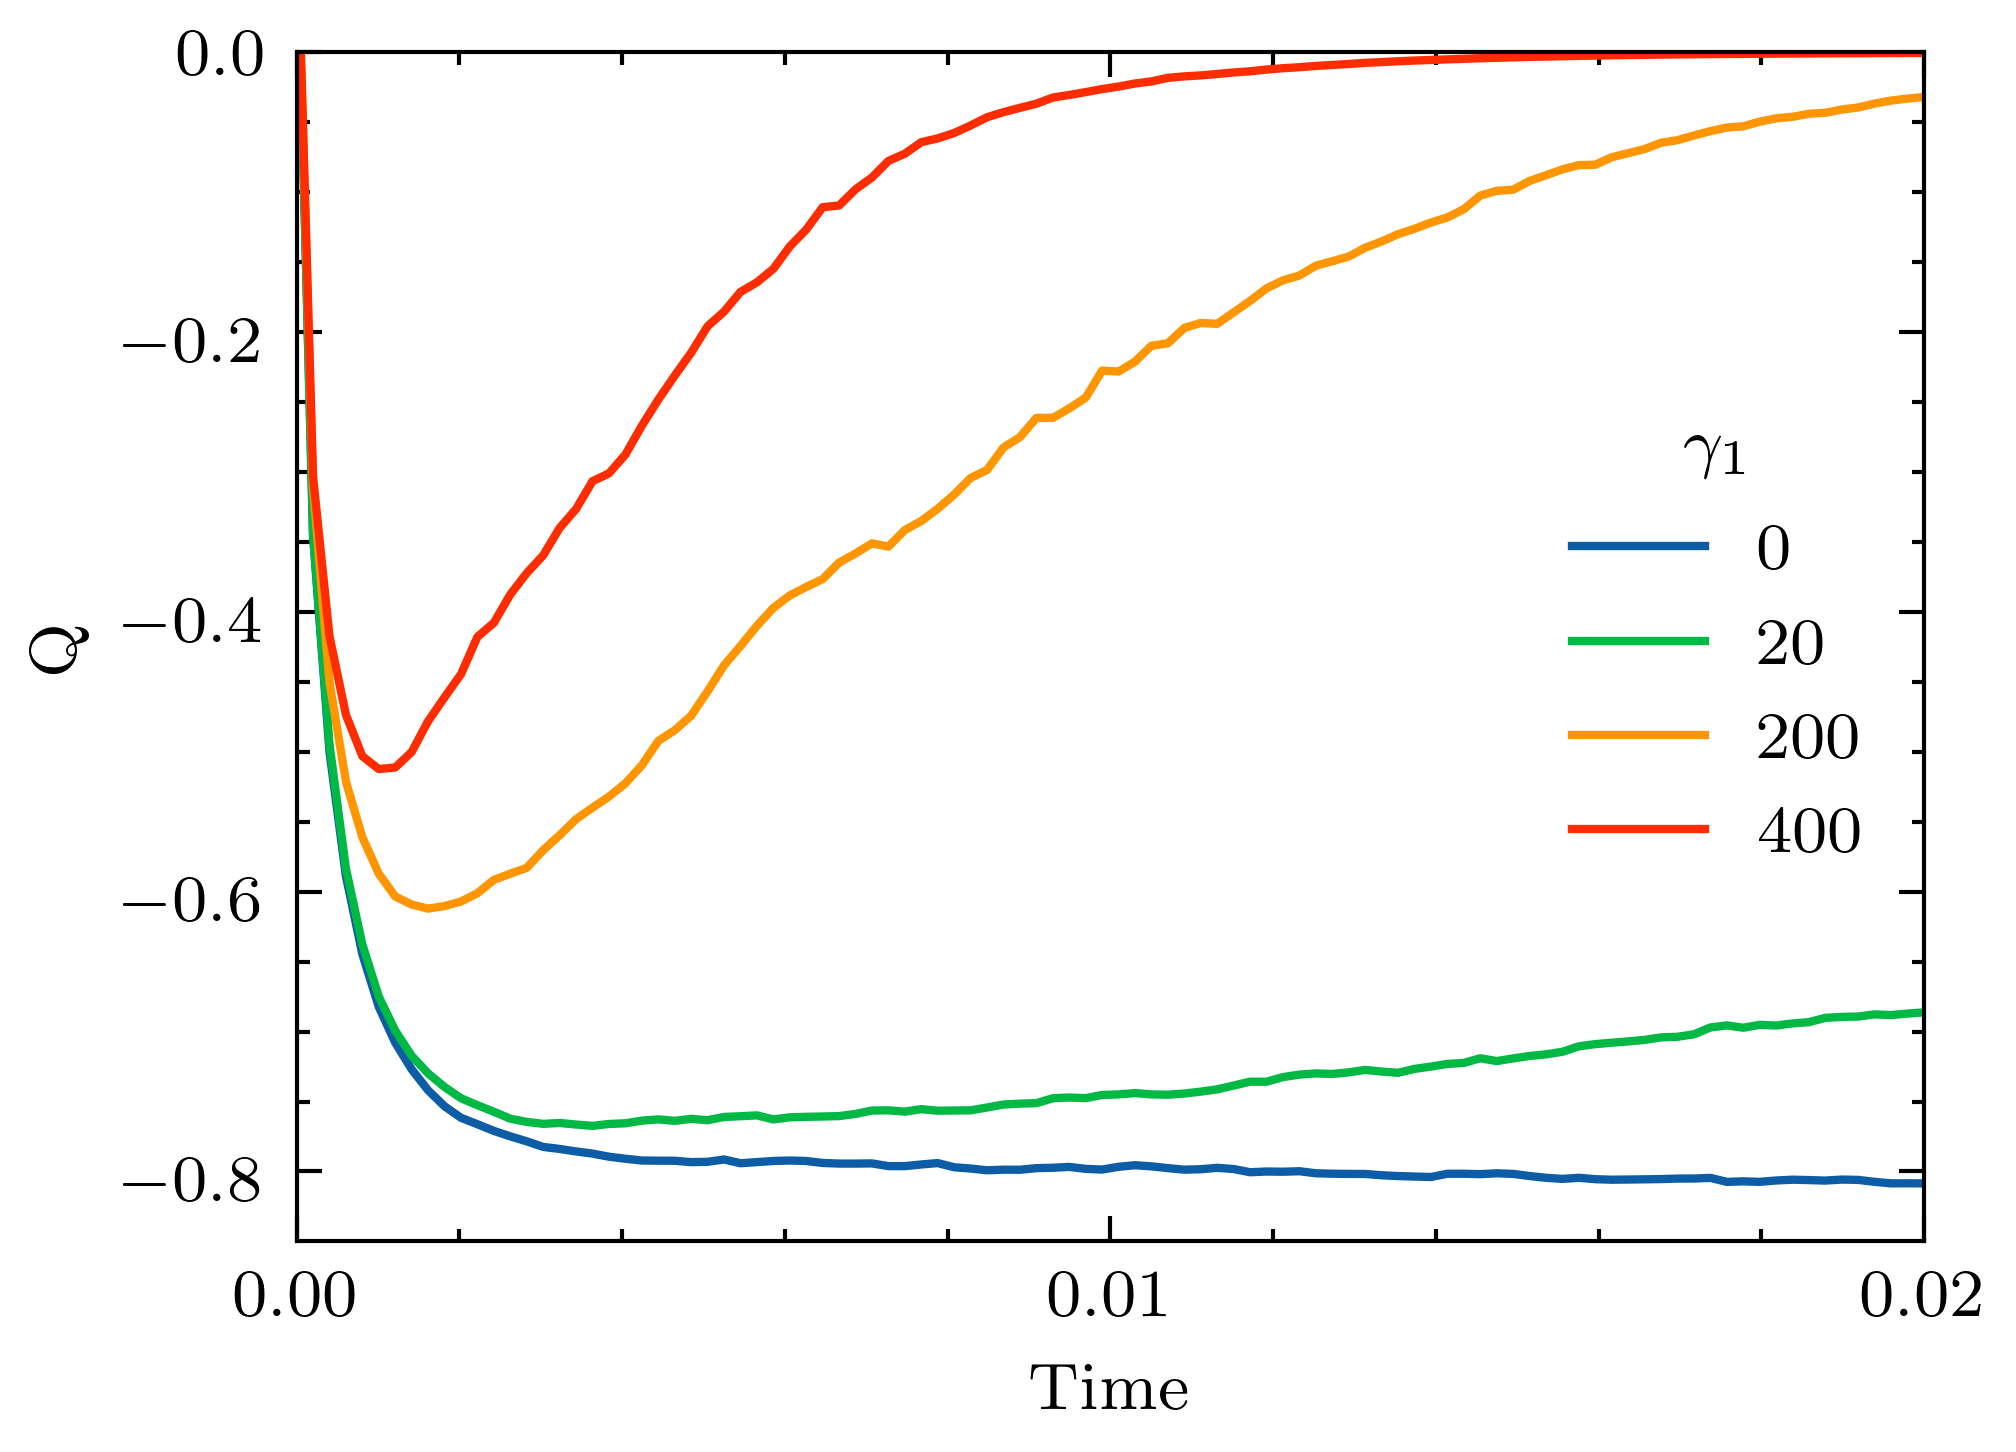

In [91]:
fig, ax = plt.subplots()

ax.plot(times, mandelQ(sol500_0), label="0")
ax.plot(times, mandelQ(sol500_20), label="20")
ax.plot(times, mandelQ(sol500_200), label="200")
ax.plot(times, mandelQ(sol500_400), label="400")


ax.set(xlabel="Time")
ax.set(ylabel="Q")
# ax.legend(loc=0)
ax.legend(title = "$\\gamma_1$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-0.85, 0.0]);

plt.xticks([0.0, 0.01, 0.02]);

fig.savefig("Q_paper_fig3_alpha500_vargamma1.pdf")
fig.savefig("Q_paper_fig3_alpha500_vargamma1.png", dpi=300)

### Constant (large) $\gamma_1$, varying $\alpha$

In [10]:
gamma_1_test = 200
gamma_2_test = param2gamma2(2, 432, 0)
gamma_3_test = param2gamma3(2, 432, 0)

In [11]:
sol100 = single_mode_solver_modified("mc", 140, 10, gamma_1_test, gamma_2_test, gamma_3_test)
sol300 = single_mode_solver_modified("mc", 364, np.sqrt(300), gamma_1_test, gamma_2_test, gamma_3_test)
sol500 = single_mode_solver_modified("mc", 581, np.sqrt(500), gamma_1_test, gamma_2_test, gamma_3_test)

sol700 = single_mode_solver_modified("mc", 794, np.sqrt(700), gamma_1_test, gamma_2_test, gamma_3_test)

10.0%. Run time:   5.99s. Est. time left: 00:00:00:53
20.0%. Run time:   8.57s. Est. time left: 00:00:00:34
30.0%. Run time:  11.68s. Est. time left: 00:00:00:27
40.0%. Run time:  15.08s. Est. time left: 00:00:00:22
50.0%. Run time:  18.53s. Est. time left: 00:00:00:18
60.0%. Run time:  21.86s. Est. time left: 00:00:00:14
70.0%. Run time:  25.09s. Est. time left: 00:00:00:10
80.0%. Run time:  28.51s. Est. time left: 00:00:00:07
90.0%. Run time:  31.84s. Est. time left: 00:00:00:03
100.0%. Run time:  35.10s. Est. time left: 00:00:00:00
Total run time:  35.28s
10.0%. Run time:  18.50s. Est. time left: 00:00:02:46
20.0%. Run time:  31.69s. Est. time left: 00:00:02:06
30.0%. Run time:  45.14s. Est. time left: 00:00:01:45
40.0%. Run time:  58.97s. Est. time left: 00:00:01:28
50.0%. Run time:  72.06s. Est. time left: 00:00:01:12
60.0%. Run time:  85.48s. Est. time left: 00:00:00:56
70.0%. Run time: 100.77s. Est. time left: 00:00:00:43
80.0%. Run time: 114.59s. Est. time left: 00:00:00:28
90.

In [14]:
times=np.linspace(0, 0.02, 100)

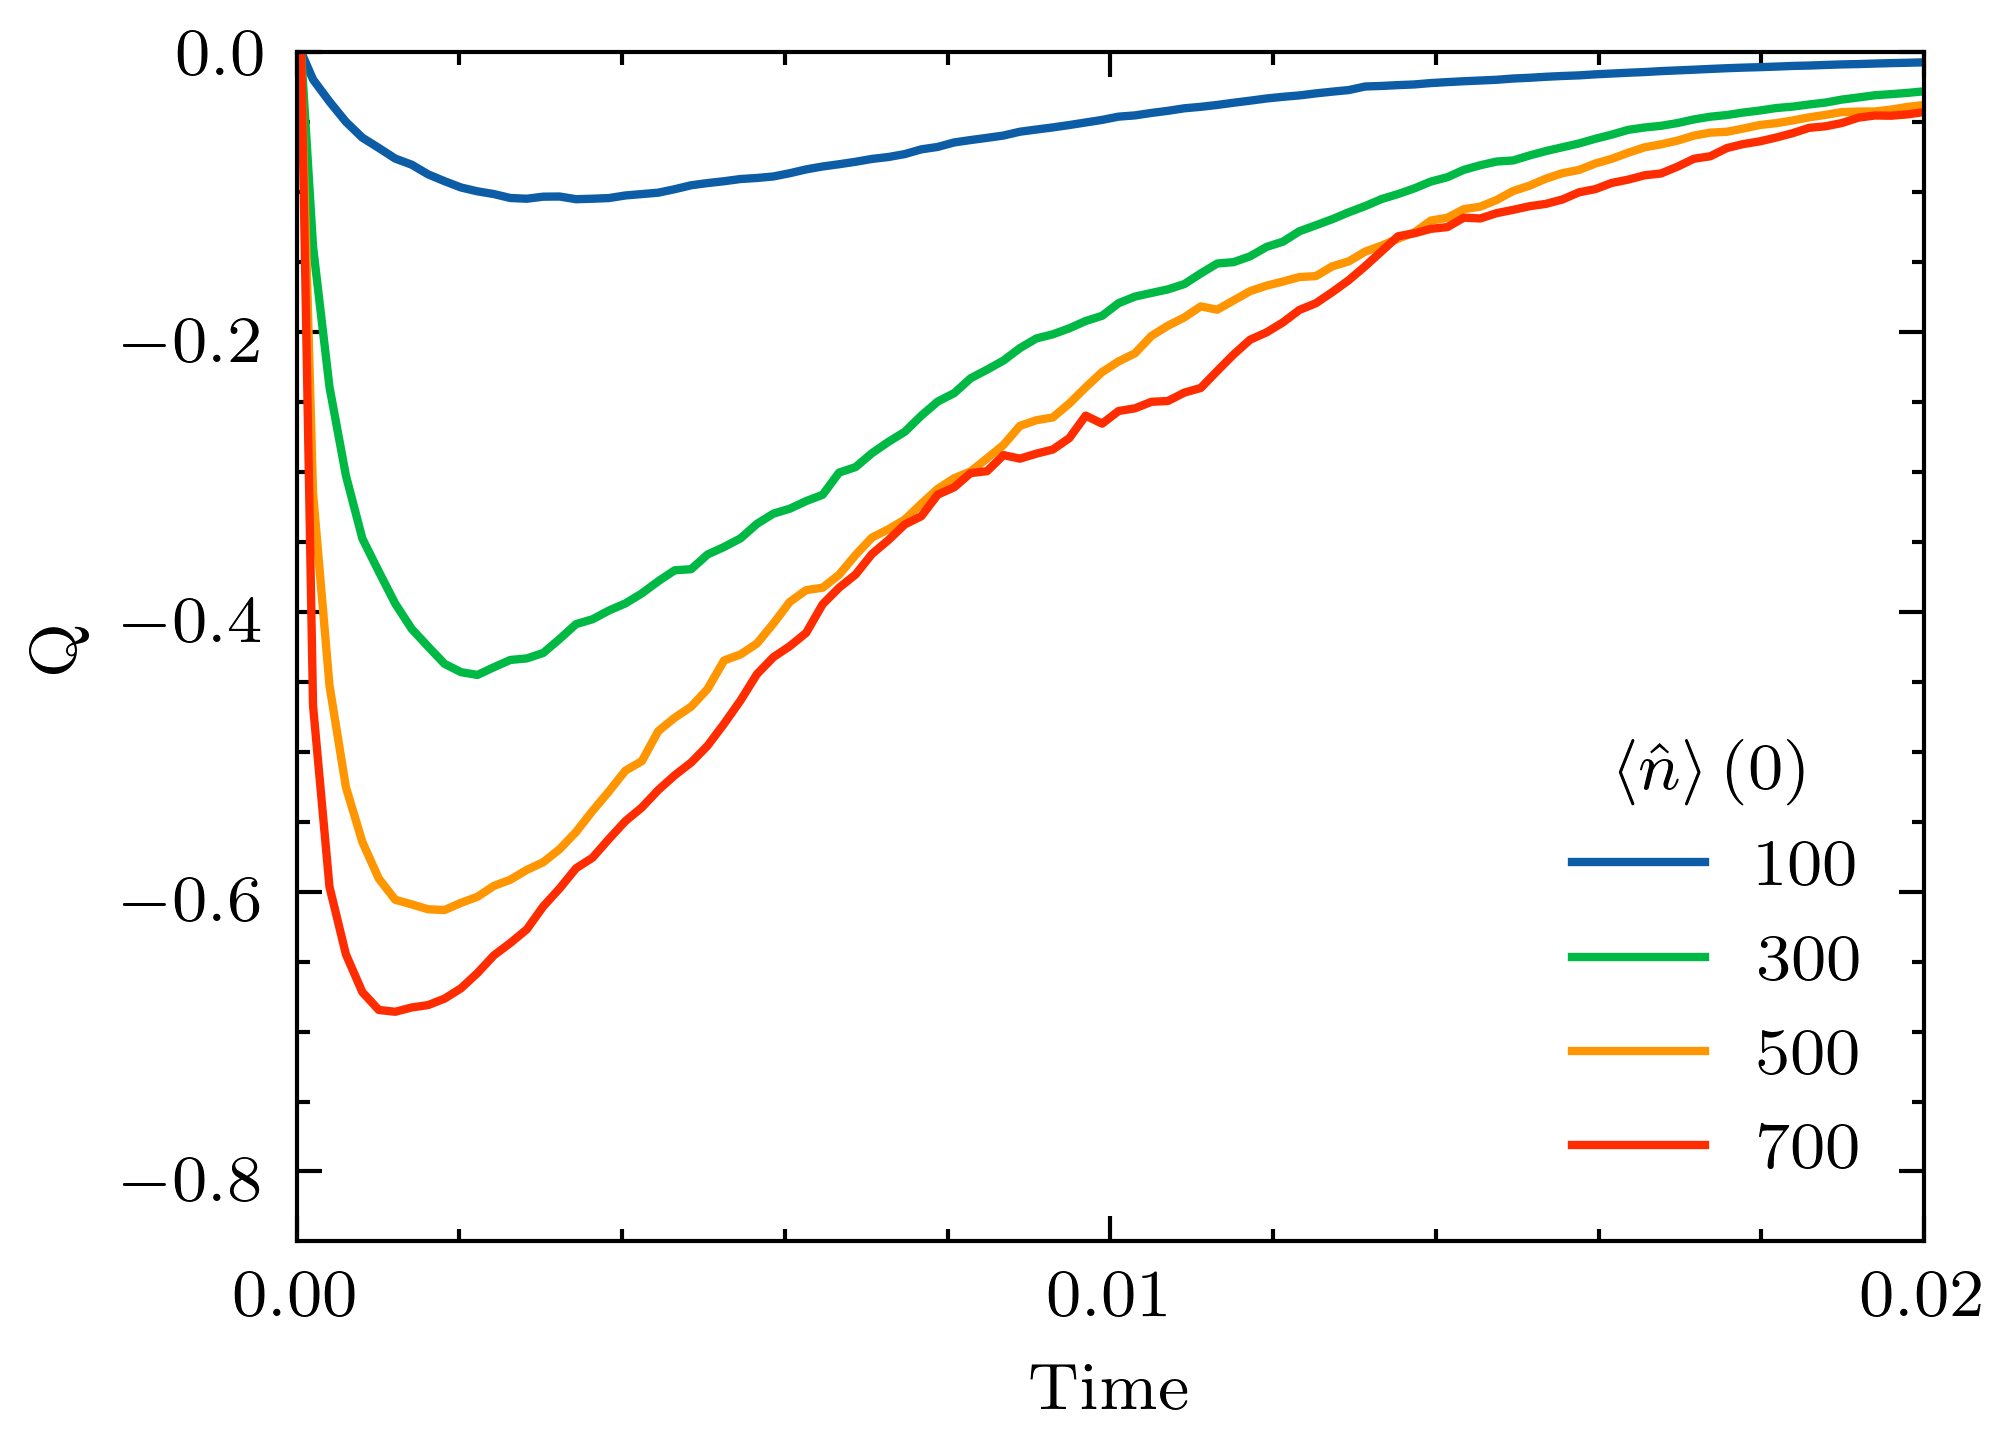

In [17]:
fig, ax = plt.subplots()

ax.plot(times, mandelQ(sol100), label="100")
ax.plot(times, mandelQ(sol300), label="300")
ax.plot(times, mandelQ(sol500), label="500")
ax.plot(times, mandelQ(sol700), label="700")

ax.set(xlabel="Time")
ax.set(ylabel="Q")
# ax.legend(loc=0)
ax.legend(title = "$\\langle \hat{n} \\rangle \\left(0\\right)$", loc=0)
ax.autoscale(tight=True)
ax.set_ylim([-0.85, 0.0]);

plt.xticks([0.0, 0.01, 0.02]);

fig.savefig("Q_paper_fig3_gamma1200_varalpha.pdf")
fig.savefig("Q_paper_fig3_gamma1200_varalpha.png", dpi=300)


### How many photons in state when it is most sub-Poissonian?

In [9]:
gamma_1_test = 200
gamma_2_test = param2gamma2(2, 432, 0)
gamma_3_test = param2gamma3(2, 432, 0)
sol700 = single_mode_solver_modified("mc", 794, np.sqrt(700), gamma_1_test, gamma_2_test, gamma_3_test)

10.0%. Run time:  49.64s. Est. time left: 00:00:07:26
20.0%. Run time:  85.01s. Est. time left: 00:00:05:40
30.0%. Run time: 119.65s. Est. time left: 00:00:04:39
40.0%. Run time: 154.06s. Est. time left: 00:00:03:51
50.0%. Run time: 190.71s. Est. time left: 00:00:03:10
60.0%. Run time: 225.55s. Est. time left: 00:00:02:30
70.0%. Run time: 260.91s. Est. time left: 00:00:01:51
80.0%. Run time: 297.08s. Est. time left: 00:00:01:14
90.0%. Run time: 332.04s. Est. time left: 00:00:00:36
100.0%. Run time: 367.55s. Est. time left: 00:00:00:00
Total run time: 367.67s


In [11]:
min(mandelQ(sol700))

-0.6901768811324049

In [14]:
[idx for idx, val in enumerate(mandelQ(sol700)) if val == min(mandelQ(sol700))]

[7]

In [15]:
mandelQ(sol700)[7]

-0.6901768811324049

In [18]:
sol700.expect[0][7]

285.50548507457137